# **Enes Alper Balta - 05170000021**

# Proje 2 - Scikit-learn ile Makine Öğrenmesi

* Aşağıdaki sorularda belirtilen problemlerin çözümlerini (istenilenleri yerine getirerek) ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz.
* Proje teslimi 09.07.2021 Cuma saat 15:00’e kadar yapılırsa projeniz 120 puan üzerinden değerlendirilecek ve final sınavı notu yerine geçecektir, 12.07.2021 Pazartesi saat 15:00’e kadar yapılırsa projeniz 100 puan üzerinden değerlendirilecek ve bütünleme sınavı notu yerine geçecektir.
* Projeler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu projelerin notunda aynı oranda kesinti yapılacaktır veya bu projeler sıfır alacaktır.
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız. Ayrıca olası güncelleme ve/veya açıklamalar için forumu takip ediniz.

**Açıklamalar:**
* Projede ekte verilen bir şirketin çalışanlarına ilişkin verileri içeren "insan_kaynaklari.csv" adlı dosya kullanılacaktır.
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları one-hot encoding yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  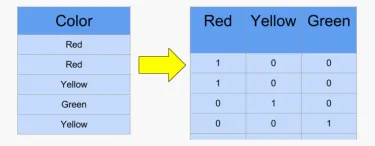
  3. Kategorik olmayan sütunlarda gerekiyorsa normalizasyon işlemi uygulayınız.
  4. Problem bir **regresyon problemi** ise k-fold cross-validation ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hyper-parametre aramasını k-fold cross-validation ile yaparak (GridSearchCV modülünü ***uygun metrikler*** ile -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanabilirsiniz), test verisi üzerinde probleme uygun metrik**ler** -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanarak tahmin modelinizin performansını değerlendiriniz. Problem bir **kümeleme problemi** ise optimum küme sayısını belirleyiniz, belirlediğiniz küme sayısına göre verileri kümeleyiniz ve bulduğunuz kümeleri kısaca analiz edip yorumlayınız.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
  6. Veri setinde olmayan yeni bir veri için geliştirdiğiniz en iyi modelin üreteceği çıktıyı (tahmin/küme) veriniz.
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

**Imports**

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import OLS
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from mpl_toolkits.mplot3d import Axes3D

# **Soru 1: Bir çalışanın memnuniyet düzeyinin tahminlenmesi**

Memnuniyet Duzeyinin tahminlenmesi Regresyon problemidir.

Dosya okuma islemi gerceklestirildi.

In [245]:
df = pd.read_csv("insan_kaynaklari.csv")

Veri setinde eksik deger olup olmadigi kontrol edildi.

In [246]:
df.isnull().sum()

memnuniyet_duzeyi                0
aldigi_degerlendirme_puani       0
gerceklestirdigi_proje_sayisi    0
aylik_ort_calisma_saati          0
sirkette_calistigi_yil_sayisi    0
is_kazasina_ugradi               0
sirketten_ayrildi                0
son_5_yilda_terfi_aldi           0
calistigi_bolum                  0
maas_derecesi                    0
dtype: int64

One Hot Encoding islemi kategorik olan *calistigi_bolum* ve *maas_derecesi* ozniteliklerine uygulandi.

In [247]:
df = pd.get_dummies(df,columns=["calistigi_bolum","maas_derecesi"])

Verisetini surekli okumamak icin yedegi alindi.

In [248]:
copied_df = df.copy()

Olusturacagimiz modele verisetini daha duzenli verebilmek adina X ve y olarak parcaladim.

In [6]:
y = df[["memnuniyet_duzeyi"]]
X = df.drop(["memnuniyet_duzeyi"],axis=1)

Model ile alakali istatistiksel detaylara ulasmak icin *statsmodel.api* altindaki *OLS* metodunu kullaniyoruz.

In [7]:
lm = OLS(y,X)
model = lm.fit()

Burada modelimizin ozeti yer almaktadir.
* $R^2$ degeri, bagimsiz degiskenlerin bagimli degiskendeki degisikligi aciklama yuzdesidir.
    * Goruldugu uzere 0.199 gibi bir degerle bagimli degiskenimizin %20 sini bagimsiz degiskenlerce aciklayabilmekteyiz.
* $Adjusted R^2$ degeri ise $R^2$ degerinin duzeltilmis halidir. $R^2$ degeri, verisetine ne kadar degisken eklenirse o kadar sismeye megillidir. Bu durum yorumlama icin yaniltici olmaktadir, bunun onune gecmek icin $Adjusted R^2$ degeri olusturulmustur. Bu da daha saglikli yorum yapmamiza olanak tanimaktadir.

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      memnuniyet_duzeyi   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     206.6
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        03:05:53   Log-Likelihood:                 1256.5
No. Observations:               14999   AIC:                            -2475.
Df Residuals:                   14980   BIC:                            -2330.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
aldigi_degerlendirme_puani        0.2459      0.012     21.062      0.000       0.223       0.269
gerceklestirdigi_proje_sayisi    -0.0409      0.002    -24.145      0.000      -0.044      -0.038
aylik_ort_calisma_saati           0.0002   4.13e-05      4.624      0.000       0.000       0.000
sirkette_calistigi_yil_sayisi    -0.0055      0.001     -4.199      0.000      -0.008      -0.003
is_kazasina_ugradi               -0.0002      0.005     -0.044      0.965      -0.010       0.010
sirketten_ayrildi                -0.2241      0.004    -50.260      0.000      -0.233      -0.215
son_5_yilda_terfi_aldi            0.0108      0.013      0.839      0.401      -0.014       0.036
calistigi_bolum_IT                0.1480      0.007     22.719      0.000       0.135       0.161
calistigi_bolum_RandD             0.1363      0.008     17.390      0.000       0.121       0.152
calistigi_bolum_accounting        0.1225      0.008     15.466      0.000       0.107       0.138
calistigi_bolum_hr                0.1391      0.008     17.338      0.000       0.123       0.155
calistigi_bolum_management        0.1405      0.009     15.721      0.000       0.123       0.158
calistigi_bolum_marketing         0.1474      0.008     19.538      0.000       0.133       0.162
calistigi_bolum_product_mng       0.1495      0.007     20.253      0.000       0.135       0.164
calistigi_bolum_sales             0.1498      0.004     35.149      0.000       0.141       0.158
calistigi_bolum_support           0.1518      0.005     29.178      0.000       0.142       0.162
calistigi_bolum_technical         0.1464      0.005     30.046      0.000       0.137       0.156
maas_derecesi_high                0.4696      0.010     49.311      0.000       0.451       0.488
maas_derecesi_low                 0.4802      0.008     60.336      0.000       0.465       0.496
maas_derecesi_medium              0.4816      0.008     60.088      0.000       0.466       0.497
==============================================================================
Omnibus:                      325.189   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.906
Skew:                          -0.165   Prob(JB):                     5.86e-47
Kurtosis:                       2.519   Cond. No.                     1.18e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.64e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **Multiple Linear Regression**

In [9]:
lr = LinearRegression()
mlr_model = lr.fit(X,y)
print("Sabit Deger\t\t\t:\t",mlr_model.intercept_[0])
print("Degiskenlerin Katsayilari\t:\n",mlr_model.coef_[0])

Sabit Deger			:	 0.6202688299304007
Degiskenlerin Katsayilari	:
 [ 2.45930996e-01 -4.08658078e-02  1.90782220e-04 -5.47274364e-03
 -2.29278307e-04 -2.24074896e-01  1.07674945e-02  4.86560749e-03
 -6.87980957e-03 -2.06185517e-02 -4.05668824e-03 -2.62120549e-03
  4.30083788e-03  6.40500041e-03  6.65811786e-03  8.66988047e-03
  3.27681088e-03 -7.50825231e-03  3.04506459e-03  4.46318772e-03]


Bu asamada verimizi train ve test olarak iki parcaya ayiriyoruz.
* Bu islemi **sklearn.model_selection** altindaki **train_test_split** metodu ile gerceklestiriyoruz.
* Gerceklestirirken sirasiyla X_train,X_test,Y_train,Y_test degerlerini esitligin sol tarafinda belirtmemiz gerekiyor.
* Parametre olarak sirasiyla
    * Bagimsiz Degisken - X
    * Bagimli Degisken - y
    * Test Verisinin sayisini belirten test_size
    * Her calismada farkli veri setleri olusturmasin diye rastgele bir deger verilen random_state degeri metoda parametre olarak verilir.

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
mlr_model = lr.fit(X_train,y_train)

Simdi modelimizin basarisini olcmek icin kullanilan **Hata Kareler Ortalamasinin Karekoku(RMSE)** ni scikit-learn araciligiyla bulalim. Bunun icin **from sklearn.metrics import mean_squared_error** seklinde fonksiyonumuzu dahil ediyoruz. Ilk parametre olarak *gercek degerler*, ikinci parametre olarak ise *tahmin edilen degerleri* girmeliyiz. Daha sonra karekokunu olarak *RMSE* degerini elde ediyoruz.

In [11]:
RMSE = np.sqrt(mean_squared_error(y_test,mlr_model.predict(X_test)))
print("Test Hatasi : ",RMSE)

Test Hatasi :  0.22298944015102945


#### K Fold Cross Validation
* Bu islemi **sklearn.model_selection** altindaki **cross_val_score** metodu ile gerceklestiriyoruz.
* Parametre olarak sirasiyla
    * Olusturdugumuz model degiskeni
    * Bagimsiz Degisken - X
    * Bagimli Degisken - Y
    * Kac katli bir gerceklestirim istedigimizi belirttigimiz cv degeri
    * Donut olarak nasil bir skorlama istedigimizi belirttigimiz scoring argumani var. Burada istersek r2 istersek de hata kareleri ortalamasini belirtebiliriz. Hata kareleri ortalamasi icin "neg_mean_squared_error" olarak arguman veririz.
* Burada sonuc olarak 10 adet hata kareler ortalamasi degeri donduruldu. Bunun sebebi veriseti 10 parcaya ayrildi her parcada bir adet birim disarda birakilarak onunla birlikte model test edildi. Bu on kez tekrarlandi, her bir deger de her denemenin hata kareler ortalamasinin sonucudur. Fonksiyon geregi sonuclar negatif geldigi icin onune bir - koyarak sonuclari + hale getirdik

In [12]:
mlr_cv_score = np.mean(cross_val_score(mlr_model,X_train,y_train,cv=10,scoring="r2"))
print("CV R2 Accuracy\t:",mlr_cv_score) 

CV R2 Accuracy	: 0.19484377402328343


**Validasyon islemi gerceklestikten sonraki Test Hatasi;**

In [13]:
mlr_RMSE_score = np.sqrt(np.mean(-cross_val_score(mlr_model,X_test,y_test,cv=10,scoring="neg_mean_squared_error")))
mlr_RMSE_score

0.22343727461700413

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [14]:
mlr_R2_score = mlr_model.score(X_test,y_test)
mlr_R2_score

0.19510951150257005

## **Farkli Modeller ile Calisma**

### **1. Feature Selection sonrasi MLR**

Korelasyona gore oznitelik secimini gerceklestirecegim.

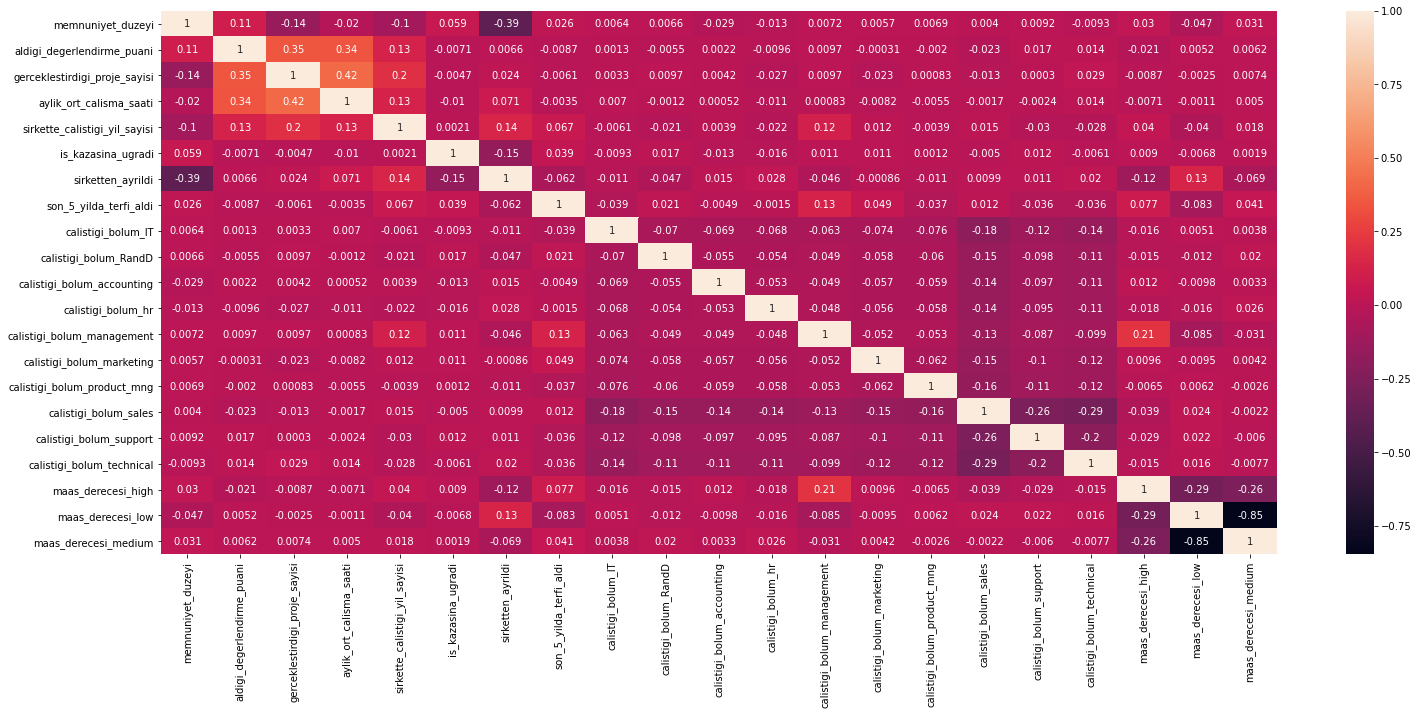

In [15]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True);
plt.show()

In [16]:
korelasyon_degerleri = abs(df.corr()["memnuniyet_duzeyi"])
korelasyon_degerleri[korelasyon_degerleri > 0.1]

memnuniyet_duzeyi                1.000000
aldigi_degerlendirme_puani       0.105021
gerceklestirdigi_proje_sayisi    0.142970
sirkette_calistigi_yil_sayisi    0.100866
sirketten_ayrildi                0.388375
Name: memnuniyet_duzeyi, dtype: float64

HeatMap ile gorsellestirdigim korelasyon tablosu ve yazdirdigim degerler goz onune alindiginda *memnuniyet_duzeyi* ozniteligi ile en fazla iliskili olan oznitelikler yukarda bulunmaktadir.
* **Burada memnuniyet_duzeyi'ne en fazla etki edecek olan oznitelik 'sirketten_ayrildi'dir.**

In [17]:
y = df[["memnuniyet_duzeyi"]]
X = df.drop(["memnuniyet_duzeyi"],axis=1).loc[:,["aldigi_degerlendirme_puani","gerceklestirdigi_proje_sayisi","sirkette_calistigi_yil_sayisi","sirketten_ayrildi"]]

Model ile alakali istatistiksel detaylara ulasmak icin *statsmodel.api* altindaki *OLS* metodunu kullaniyoruz.

In [18]:
lm = OLS(y,X)
model = lm.fit()

Goruldugu uzere bagimsiz degiskenlerin bagimli degiskendeki degisikligi aciklama yuzdesi olan $R^2$ degeri, *0.199* dan *0.847* ye cikmistir

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      memnuniyet_duzeyi   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                          2.076e+04
Date:                Fri, 09 Jul 2021   Prob (F-statistic):                        0.00
Time:                        03:06:12   Log-Likelihood:                         -998.45
No. Observations:               14999   AIC:                                      2005.
Df Residuals:                   14995   BIC:                                      2035.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
aldigi_degerlendirme_puani        0.7931      0.010     79.178      0.000       0.773       0.813
gerceklestirdigi_proje_sayisi    -0.0043      0.002     -2.420      0.016      -0.008      -0.001
sirkette_calistigi_yil_sayisi     0.0238      0.001     16.796      0.000       0.021       0.027
sirketten_ayrildi                -0.2053      0.005    -41.014      0.000      -0.215      -0.195
==============================================================================
Omnibus:                      879.551   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1041.619
Skew:                          -0.644   Prob(JB):                    6.54e-227
Kurtosis:                       2.910   Cond. No.                         26.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lr = LinearRegression()
mlr_model2 = lr.fit(X,y)
print("Sabit Deger\t\t\t:\t",mlr_model2.intercept_[0])
print("Degiskenlerin Katsayilari\t:\n",mlr_model2.coef_[0])

Sabit Deger			:	 0.6451265639615822
Degiskenlerin Katsayilari	:
 [ 0.25859469 -0.0382945  -0.00542189 -0.2220661 ]


In [21]:
mlr_model2 = lr.fit(X_train,y_train)

Simdi modelimizin basarisini olcmek icin kullanilan **Hata Kareler Ortalamasinin Karekoku(RMSE)** ni scikit-learn araciligiyla bulalim. Bunun icin **from sklearn.metrics import mean_squared_error** seklinde fonksiyonumuzu dahil ediyoruz. Ilk parametre olarak *gercek degerler*, ikinci parametre olarak ise *tahmin edilen degerleri* girmeliyiz. Daha sonra karekokunu olarak *RMSE* degerini elde ediyoruz.

In [22]:
RMSE = np.sqrt(mean_squared_error(y_test,mlr_model2.predict(X_test)))
print("Test Hatasi : ",RMSE)

Test Hatasi :  0.22298944015102945


#### K Fold Cross Validation
* Bu islemi **sklearn.model_selection** altindaki **cross_val_score** metodu ile gerceklestiriyoruz.
* Parametre olarak sirasiyla
    * Olusturdugumuz model degiskeni
    * Bagimsiz Degisken - X
    * Bagimli Degisken - Y
    * Kac katli bir gerceklestirim istedigimizi belirttigimiz cv degeri
    * Donut olarak nasil bir skorlama istedigimizi belirttigimiz scoring argumani var. Burada istersek r2 istersek de hata kareleri ortalamasini belirtebiliriz. Hata kareleri ortalamasi icin "neg_mean_squared_error" olarak arguman veririz.
* Burada sonuc olarak 10 adet hata kareler ortalamasi degeri donduruldu. Bunun sebebi veriseti 10 parcaya ayrildi her parcada bir adet birim disarda birakilarak onunla birlikte model test edildi. Bu on kez tekrarlandi, her bir deger de her denemenin hata kareler ortalamasinin sonucudur. Fonksiyon geregi sonuclar negatif geldigi icin onune bir - koyarak sonuclari + hale getirdik

In [23]:
mlr_cv_score2 = np.mean(cross_val_score(mlr_model2,X_train,y_train,cv=10,scoring="r2"))
print("CV R2 Accuracy\t:",mlr_cv_score2) 

CV R2 Accuracy	: 0.19484377402328343


**Validasyon islemi gerceklestikten sonraki Test Hatasi;**

In [24]:
mlr_RMSE_score2 = np.sqrt(np.mean(-cross_val_score(mlr_model2,X_test,y_test,cv=10,scoring="neg_mean_squared_error")))
mlr_RMSE_score2

0.22343727461700413

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [25]:
mlr_R2_score2 = mlr_model2.score(X_test,y_test)
mlr_R2_score2

0.19510951150257005

Oznitelik azaltmamiza ragmen modelimizdeki basari yuzdesinin buyuk bir degisiklige ugramadigini goruyoruz.

### **2. Random Forest**

Temeli birden cok karar agacinin urettigi tahminlerin bir araya getirilerek degerlendirilmesine dayanir.
* Bagging(Breiman,1996) ile Random Subspace(Ho,1998) yontemlerinin birlesimi ile olusmustur.
* Agaclar icin *gozlemler Bootstrap rastgele ornek secim yontemi* ile *degiskenler ise Random Subspace yontemi* ile secilir. Boylece hem gozlemlerde hem de degiskenlerde rassalli saglanmis olur. Basarisini da buradan almaktadir.
* Random Subspace ise $p$ adet degiskenin arasindan $p$'den daha kucuk bir sayiyi ifade eden $k$ adet degisken secilip olusturulmus olan agaclarin dugum noktalarinda bir karar mekanizmasiyla degiskenler degerlendirilmis olur.
* Karar agacinin her bir dugumunde en iyi dallara ayirici(bilgi kazanci) degisken, tum degiskenler arasindan rastgele secilen daha az sayidaki degisken arasindan secilir.
* Agac olusturmada verisetinin $\dfrac{2}{3}$'u kullanilir. Disarida kalan veri, agaclarin performans degerlendirmesi ve degisken oneminin belirlenmesi icin kullanilir.
* Her dugun noktasinda rastgele degisken secimi yapilir. (Regresyonda $\dfrac{p}{3}$ , Siniflandirmada $\sqrt{p}$)
* Nihai tahmin icin agaclardan tahmin degerleri talep edilirken her bir agacin daha once hesaplanan hata oranlari goz onune alinarak agaclara agirlik verilir.
* Bagging ile RF arasinda bir iliski vardir. RD'da secilecek olan degisken sayisini, degisken sayisina esitledigimizde Bagging yapilmis olur. Yani Bagging RF'in ozel bir halidir.
* <div> 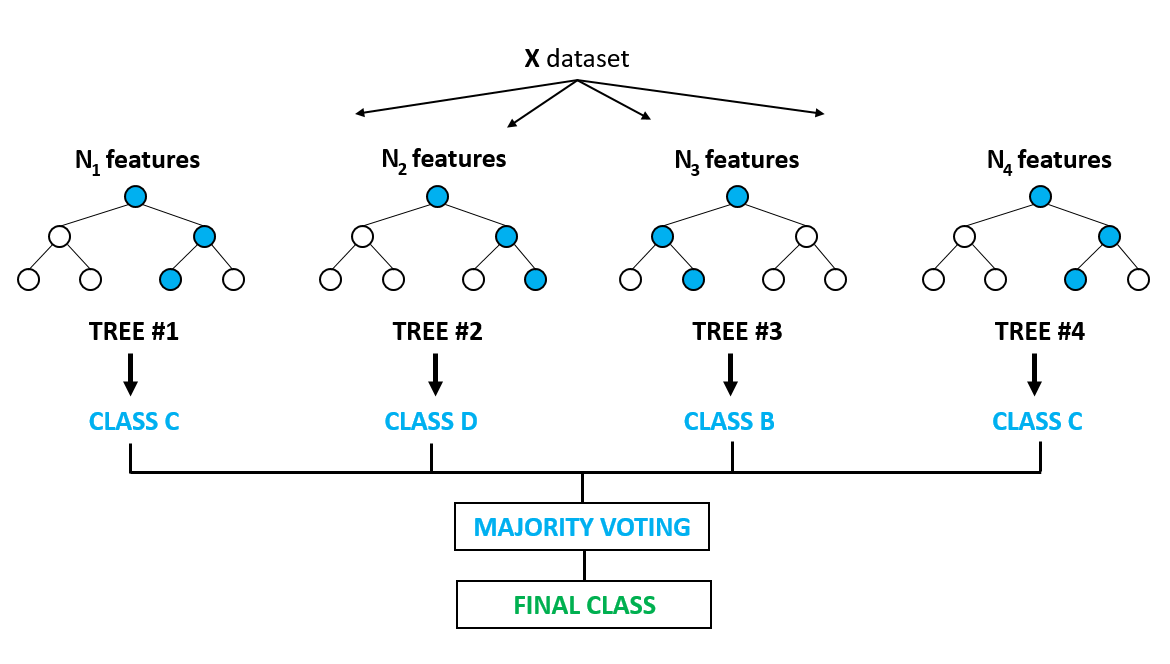</div>

In [26]:
y = copied_df[["memnuniyet_duzeyi"]]
X = copied_df.drop(["memnuniyet_duzeyi"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

### RF - Model Oluşturma

Fonksiyonumuzu **sklearn.ensemble** altindan **RandomForestRegressor** ile projemize dahil ediyoruz.
* n_estimators : birbirinden farkli olusturulan agaclarin sayisini vermektedir.
* max_depth : her agacin maksumum derinlik seviyesini ifade eder
* min_sample_split : bir node bolunmeden once bu nodedaki gozlem sayisini ifade ediyor
* max_features : bolunme islemlerinde goz onunde bulundurulacak olan maksimum degisken sayisini ifade ediyor 
* min_samples_leaf : leaf nodedaki minimum gozlem sayisini ifade ediyor
* rf'da daha onemli olan uc parametre vardir; *n_estimators* - *max_features* - max_depth

In [27]:
rf_model = RandomForestRegressor(random_state=99).fit(X_train,y_train.values.ravel())

In [28]:
print("Ilkel Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,rf_model.predict(X_test))))

Ilkel Test Hatasi:	 0.17430684083114253


#### RF - Model Tuning

RF'da teorik olarak uzerinde bulundugu verisetlerinde iyi calistigina inanilan iki adet **n_estimators** yani agac sayisi degeri bulunmaktadir. Bunlar **500 ve 1000** sayisidir. Fakat [200,500,1000,2000] degerlerini denemek daha yararli olacaktir.

Random Forest icerisinde verdigimiz parametre kadar alt agac bulunmaktadir. Ayrica parametreler icin verdigimiz her bir degerin kombinasyonu kadar deneme yapilacagi ve bunun da 10 katli olarak gerceklestirilecegi icin islem yuku bir hayli fazladir.
* Buna cozum olarak modelin kurulma suresini dusurmek icin es zamanli yapilacak islemleri de devreye alir ve islemciyi tam kapasitede kullanilir.
    * Bunu gerceklestirmek icin GridSearchCV fonksiyonuna parametre olarak **n_jobs = -1** verilir.


In [265]:
rf_params = {"max_depth" : list(range(1,5)),
            "max_features" : [5,10,15],
            "n_estimators" : [500,1000]}

In [266]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=1).fit(X_train,y_train.values.ravel())

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [267]:
rf_cv_model.best_params_

{'max_depth': 4, 'max_features': 10, 'n_estimators': 500}

In [268]:
print("Validasyon Sonrasi Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,rf_cv_model.predict(X_test))))

Validasyon Sonrasi Test Hatasi:	 0.187028757512884


Burada ilk kez degiskenlerin onem duzeylerine bir goz atacagiz.

In [269]:
rf_model = RandomForestRegressor(max_depth=4,max_features = 10,n_estimators= 500).fit(X_train,y_train.values.ravel())
Importance = pd.DataFrame({"Importance" : rf_model.feature_importances_*100}, index=X_train.columns)

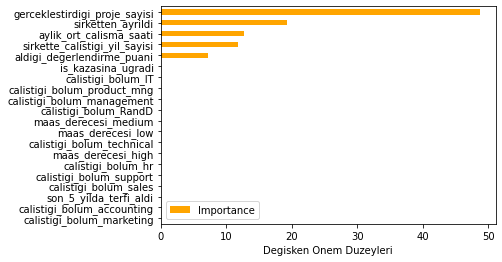

In [270]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="orange")
plt.xlabel("Degisken Onem Duzeyleri");

In [271]:
rf_cv_score = np.mean(cross_val_score(rf_model,X_train,y_train.values.ravel(),cv=10,scoring="r2"))
print("CV R2 Accuracy\t:",rf_cv_score) 

CV R2 Accuracy	: 0.4527323564503395


**Validasyon islemi gerceklestikten sonraki Test Hatasi;**

In [272]:
rf_RMSE_score = np.sqrt(np.mean(-cross_val_score(rf_model,X_test,y_test.values.ravel(),cv=10,scoring="neg_mean_squared_error")))
rf_RMSE_score

0.18802400390089433

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [273]:
rf_R2_score = rf_model.score(X_test,y_test)
rf_R2_score

0.43216848109384653

### **3. Ridge Regresyon**

Amaç hata kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır.
* Standart regresyonda  Hata Kareleri Toplamını(EKK) aşağıdaki formül ile bulabiliyoruz. <div> 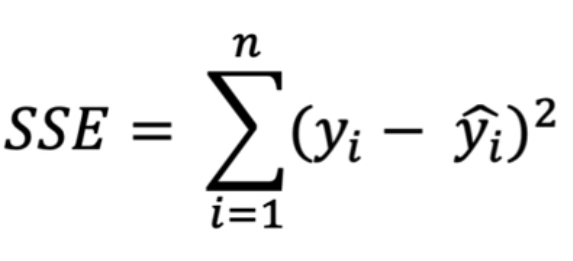</div>
* Ridge Regresyon içinse <div> 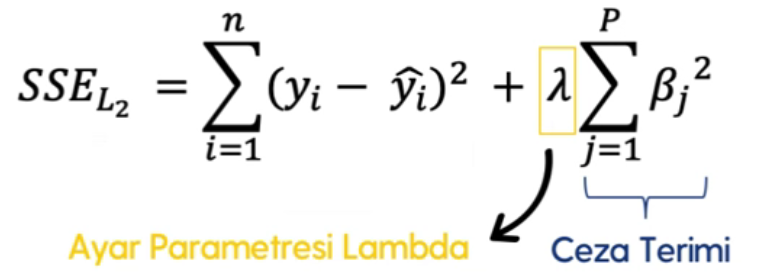</div>
* Ridge,Lasso ve ElasticNet Regresyon, literaturde duzenlilestirme yontemleri olarak gecmektedir. Buradaki $L_2$ ifadesi, buradaki duzenlilestirme durumunu ifade eden normdur. Bu normun ifade ettigi sey ise $\beta_j$ degerinin kare alma islemidir.
* **$\lambda$ Ayar Parametresinin belirlenmesi**
    * $\lambda$ = Ayar parametresidir. Yani kullanıcı tarafından belirlenen, ayarlanan, optimize edilmesi gereken parametredir.
    * $\beta$'lar ise veriseti içerisinden bulunacak olan parametrelerdir.
    * $\lambda$ = 0 olduğunda formül klasik regresyona dönmektedir. Bizim arayışımız ise Hata Kareler Toplamını(SSE) minimum yapan $\lambda$ değeridir.
    * $\lambda$ için belirli değerleri içeren bir küme seçilir ve her birisi için cross validation test hatası hesaplanır.
    * En küçük cross validation'ı veren $\lambda$ ayar parametresi olarak seçilir.
    * Son olarak seçilen bu $\lambda$ ile model yeniden tüm gözlemlere fit edilir.

In [29]:
y = copied_df[["memnuniyet_duzeyi"]]
X = copied_df.drop(["memnuniyet_duzeyi"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

#### RR - Model Oluşturma

In [30]:
ridge_model = Ridge(alpha=0.1).fit(X_train,y_train)
print("Sabit Deger\t\t\t:\t",ridge_model.intercept_[0])
print("Degiskenlerin Katsayilari\t:\n",ridge_model.coef_[0])

Sabit Deger			:	 0.6235668844686088
Degiskenlerin Katsayilari	:
 [ 2.42303744e-01 -4.01290562e-02  1.70467027e-04 -4.79848537e-03
 -1.18811446e-03 -2.24329122e-01  1.07406538e-02  3.25659842e-03
 -6.54119807e-03 -1.40492961e-02 -2.64922374e-03  2.17311744e-03
  3.20236039e-04  3.21937599e-04  4.07818270e-03  9.55564659e-03
  3.53399912e-03 -5.85712284e-03  2.14894888e-04  5.64222794e-03]


Farkli lambda degerleri icin katsayilarin degisimini gozlemlemek istersek;
* Buradaki birbirinden farkli renkler katsayilarin degerlerini ifade etmektedir.
* x duzeyinde ifade edilen $10^{-1}$den $10^{9}$a kadar olan degerler de lambdanin degerlerini ifade etmektedir.
* Bu grafik farkli lambda degerlerine gore elimizdeki katsayilarin nasil degistigini guzel bir sekilde gozlemleyebiliyoruz.
* Ridge regresyon modeli, lambdalar arttikca katsayilari cezalandirarak 0'a dogru yaklastirmistir.

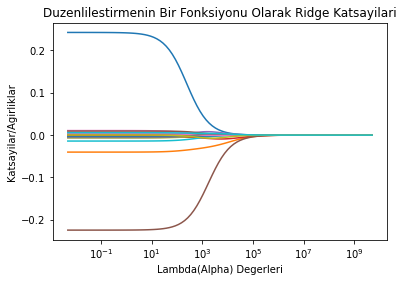

In [31]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambdalar, np.reshape(katsayilar,(100,20)))
ax.set_xscale("log")

plt.xlabel("Lambda(Alpha) Degerleri")
plt.ylabel("Katsayilar/Agirliklar")
plt.title("Duzenlilestirmenin Bir Fonksiyonu Olarak Ridge Katsayilari");

Grafigi yorumlayacak olursak
* Renklerin her biri ayri bir parametreyi temsil etmektedir.
* Lambda degeri arttikca yuksek olan parametreler lambda degerinin ceza etkisiyle sifira yaklasmaya basliyorlar.
* Ridge regresyonun lambda muamelesi, katsayilari hicbir sekilde sifir yapmamaktir ama butun katsayilari modelde tutup bu katsayilarin modele olan etkilerini ayarlayabilmektir, sifira yaklastirmak gibi. Ridge Regresyon ile Lasso Regresyonun farklilastigi nokta da tam burasidir.

In [32]:
ridge_model = Ridge().fit(X_train,y_train)

In [33]:
print("Ilkel Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,ridge_model.predict(X_test))))

Ilkel Test Hatasi:	 0.22299070683007644


#### RR - Model Tuning
Ridge regresyon modelinde lambda parametresi dissal yani optimize edilmesi gereken bir parametre oldugu icin bu modele bir model tuning islemi uygulamamiz gerekmektedir.

Burada lambdalari denemek icin bir liste olustuyoruz.

In [34]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

Daha sonra optimum lambda sayisini bulabilmek icin RidgeCV fonksiyonunu kullaniyoruz.
* alphas parametresine denemek istedigimiz lambda degerlerini
* scoring parametresine hangi skorlama yontemini istedigimizi
* cv parametresine kac katli cv istedigimizi
* normalize parametresine de True atiyoruz cunku degerlerin standartlastirilmasini istiyoruz.
<br>
Parametreler girildikten sonra modelimizi train setiyle fit etmemiz gerekiyor.

In [35]:
ridge_cv = RidgeCV(alphas=lambdalar,scoring="neg_mean_squared_error",cv=10,normalize=True).fit(X_train,y_train)

RidgeCV icerisinden elde edilen lambda degerini **ridge_cv.alpha_** seklinde edinebiliyoruz. Bu alpha degerini elde ettikten sonra final modelimizi olusturmamiz gerekiyor.

In [36]:
ridge_cv.alpha_

0.005

In [37]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_,normalize=True).fit(X_train,y_train)

In [38]:
print("Validasyon Sonrasi Test Hatasi:\t",np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(X_test))))

Validasyon Sonrasi Test Hatasi:	 0.22299553431918634


In [39]:
rr_cv_score = np.mean(cross_val_score(ridge_tuned,X_train,y_train.values.ravel(),cv=10,scoring="r2"))
print("CV R2 Accuracy\t:",rr_cv_score) 

CV R2 Accuracy	: 0.19485678667295264


**Validasyon islemi gerceklestikten sonraki Test Hatasi;**

In [285]:
rr_RMSE_score = np.sqrt(np.mean(-cross_val_score(ridge_tuned,X_test,y_test.values.ravel(),cv=10,scoring="neg_mean_squared_error")))
rr_RMSE_score

0.22343439001776955

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [286]:
rr_R2_score = ridge_tuned.score(X_test,y_test)
rr_R2_score

0.19506551654918847

* Toplamda 4 adet farkli model ile tahmin gerceklestirdik.
* Bu modellerin sonuclarini bir DataFrame olarak goz atacak olursak;

In [287]:
col = ["CV R2 Accuracy","RMSE","R2"]
row = [{"CV R2 Accuracy" : mlr_cv_score,"RMSE":mlr_RMSE_score,"R2":mlr_R2_score},
      {"CV R2 Accuracy" : mlr_cv_score2,"RMSE":mlr_RMSE_score2,"R2":mlr_R2_score2},
      {"CV R2 Accuracy" : rf_cv_score,"RMSE":rf_RMSE_score,"R2":rf_R2_score},
      {"CV R2 Accuracy" : rr_cv_score,"RMSE":rr_RMSE_score,"R2":rr_R2_score}]

result = pd.DataFrame(row,columns=col,index=["Multiple Linear Reg","MLR with FS","Random Forest","Ridge Regression"])
result

,CV R2 Accuracy,RMSE,R2
Multiple Linear Reg,0.194844,0.223437,0.195110
MLR with FS,0.194844,0.223437,0.195110
Random Forest,0.452732,0.188024,0.432168
Ridge Regression,0.194857,0.223434,0.195066


## **Yeni Deger ile Tahmin**

* Yukarida 4 model ile tahminleme islemi gerceklestirildi.
* Bu modellerin dogrulugunu yukaridaki *result* degiskeni icerisindeki DataFrame de acikca gorebiliriz.
* Feature Selection isleminin Multiple Linear Regression uzerinde hicbir etkisi olmadigini gorebiliyoruz.
* En basarili modelin de **Random Forest** oldugunu gorebiliyoruz.

In [288]:
yeni_deger = pd.DataFrame([[  0.97,   2.  , 198.  ,   3.  ,   1.  ,   1.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   1.  ]],columns=X_train.loc[0].index)
print("Random Forest modeliyle tahmin edilmis memnuniyet_duzeyi\t:\t",rf_model.predict(yeni_deger)[0])

Random Forest modeliyle tahmin edilmis memnuniyet_duzeyi	:	 0.5784166971961022


# **Soru 2: Bir çalışanın şirketten ayrılıp ayrılmayacağının tahminlenmesi**

Sirketten ayirilip ayrilmayacaginin tahminlenmesi Siniflandirma problemidir.

In [40]:
y = copied_df["sirketten_ayrildi"]
X = copied_df.drop(["sirketten_ayrildi"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

## **Lojistik Regresyon**

Amaç sınıflandırma problemı için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır. 
* 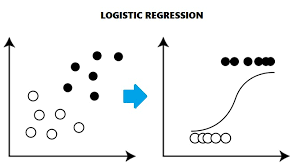
* Bagimli degisken kategoriktir.
* Adini bagimli degiskene uygulanan logit donusumunden alir.
* Dogrusal Regresyonda aranan varsayimlar burada aranmadigi icin daha esnek kullanilabilirligi vardir.
* Bagimli degiskenin 1 olarak tanimlanan degerinin gerceklesme olasiligi hesaplanir. Dolayisiyla bagimli degiskenin alacagi deger ile ilgilenilmez.
* Logistic fonksiyonun sayesinde uretilen degerler 0-1 arasinda olur.

### LojR - Model Oluşturma

* solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
    * Algorithm to use in the optimization problem.
    * For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
    * For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
* Burada cok buyuk bir veriseti kullanmadigimiz icin liblinear bizim icin uygun olacaktir.

In [41]:
log_model = LogisticRegression(max_iter=500).fit(X_train,y_train)

#### LojR - Model Tuning

Lojistik Regresyonun diger modeller gibi bir dissal hiperparametresi bulunmuyor. Burada optimize edilebilecek parametre olarak degerlendirilebilecek tek sey sabit yani intercept degeridir. Bu sebeple burada tuning yerine validation islemi gerceklestirecegiz.

Bu asamada modelin basarisini tespit etmek icin
* **sklearn.metrics** altindan **confusion_matrix** fonksiyonu kullanilir. Bu daha once bahsettigimiz karmasiklik matrisinin gerceklestirimini yapar. Ilk parametre olarak gercek y degerlerini, ikinci parametre olarak tahmin edilen y degerleri verilmektedir.
* **sklearn.metrics** altindan **accuracy_score** fonksiyonu kullanilir. Bu dogru siniflandirma oranini vermektedir (dogru sinif/toplamsinif). Ilk parametre olarak gercek y degerlerini, ikinci parametre olarak tahmin edilen y degerleri verilmektedir.
* **sklearn.metrics** altindan **classification_report** fonksiyonu kullanilir. Bu fonksiyon bir siniflandirma algoritmasinin en detayli sonuclarini bize sunmaktadir. Ilk parametre olarak gercek y degerlerini, ikinci parametre olarak tahmin edilen y degerleri verilmektedir. Ciktisini daha duzgun gormek icin print ile bastirilmasi tavsiye edilir.

In [42]:
confusion_matrix(y_test,log_model.predict(X_test))

array([[3525,  293],
       [ 735,  397]])

In [43]:
accuracy_score(y_test,log_model.predict(X_test))

0.7923232323232323

In [44]:
print(classification_report(y_test,log_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3818
           1       0.58      0.35      0.44      1132

    accuracy                           0.79      4950
   macro avg       0.70      0.64      0.65      4950
weighted avg       0.77      0.79      0.77      4950



Modelimizin siniflandirma olasikliklarini gormek icin **model.predict_proba()** fonksiyonuyla tahminleme islemi gerceklestirdigimizde fonksiyon bizlere 0 ve 1 degerlerinin olma olasiliklarini dondurmektedir.
Burada dikkat edilmesi gereken sey **Birinci Sutun 0 degerinin olma olasiliklarini, Ikinci Sutun ise 1 degerinin olma olasiliklarini ifade etmektedir.** Bizim burada ilgilendigimiz ve aradigimiz deger 1 degeri oldugu icin ikinci sutundan cesitli yorumlar ortaya koyabiliriz.

In [45]:
log_prob = pd.DataFrame(data=log_model.predict_proba(X_test),columns=["0 Olma Olasiligi","1 Olma Olasiligi"])
log_prob.head()

,0 Olma Olasiligi,1 Olma Olasiligi
0,0.702601,0.297399
1,0.752930,0.247070
2,0.950472,0.049528
3,0.955275,0.044725
4,0.903756,0.096244


Basari olcumunu gerceklestirdigimiz bir baska yontem ise daha onceden de bahsettigimiz ROC Egrisidir.
* Bu yontemi kullanmak icin;
    * **sklearn.metrics** altindan **roc_auc_score** fonksiyonu kullanilir. Bu deger ROC egrisi altinda kalan alanin degerini verir bu da area under cure (auc) score olarak gecer.
    * **sklearn.metrics** altindan **roc_curve** fonksiyonu kullanilir.
    * fpr = false positive rate
    * tpr = true positive rate
    * Burada mavi egri modelimizin basarisini olcmekte kullanacagimiz egridir.
    * Buradaki kirmizi cizgi ise hicbir modelleme islemi yapmasaydim zaten elde edecek oldugum basariyi ifade etmektedir. Yani tahminlere rastgele 1-0 degerleri atansa bu cizgi ortaya cikacakti.

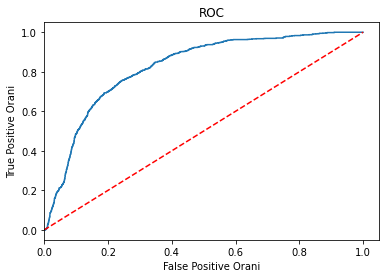

In [46]:
logit_roc_auc = roc_auc_score(y_test,log_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label = "AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.05])
plt.xlabel("False Positive Orani")
plt.ylabel("True Positive Orani")
plt.title("ROC")
plt.show()

In [48]:
log_cv_score = np.mean(cross_val_predict(log_model,X_train,y_train.values.ravel(),cv=10))
print("CV R2 Accuracy\t:",log_cv_score) 

CV R2 Accuracy	: 0.14200417952035027


**Validasyon islemi gerceklestikten sonraki Test Hatasi;**

In [49]:
log_RMSE_score = np.sqrt(np.mean(-cross_val_score(log_model,X_test,y_test.values.ravel(),cv=10,scoring="neg_mean_squared_error")))
log_RMSE_score

0.45660141095363305

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [50]:
log_R2_score = accuracy_score(y_test,log_model.predict(X_test))
log_R2_score

0.7923232323232323

## **Farkli Modeller ile Calisma**

### **1. Feature Selection sonrasi Logistic Regression**

In [51]:
korelasyon_degerleri = abs(copied_df.corr()["sirketten_ayrildi"])
korelasyon_degerleri[korelasyon_degerleri > 0.1]

memnuniyet_duzeyi                0.388375
sirkette_calistigi_yil_sayisi    0.144822
is_kazasina_ugradi               0.154622
sirketten_ayrildi                1.000000
maas_derecesi_high               0.120929
maas_derecesi_low                0.134722
Name: sirketten_ayrildi, dtype: float64

Korelasyon tablosundan yazdirdigim degerler goz onune alindiginda *sirketten_ayrildi* ozniteligi ile en fazla iliskili olan oznitelikler yukarda bulunmaktadir.
* **Burada sirketten_ayrildi'ya en fazla etki edecek olan oznitelik 'memnuniyet_duzeyi'dir.**

In [52]:
y = copied_df[["sirketten_ayrildi"]]
X = copied_df.drop(["sirketten_ayrildi"],axis=1).loc[:,["memnuniyet_duzeyi","sirkette_calistigi_yil_sayisi","is_kazasina_ugradi","maas_derecesi_high","maas_derecesi_low"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 25)

In [53]:
log_model2 = LogisticRegression(max_iter=500).fit(X_train,y_train.values.ravel())

#### LojR - Model Tuning

In [54]:
confusion_matrix(y_test,log_model2.predict(X_test))

array([[2615,  213],
       [ 687,  235]])

In [55]:
accuracy_score(y_test,log_model2.predict(X_test))

0.76

In [56]:
print(classification_report(y_test,log_model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2828
           1       0.52      0.25      0.34       922

    accuracy                           0.76      3750
   macro avg       0.66      0.59      0.60      3750
weighted avg       0.73      0.76      0.73      3750



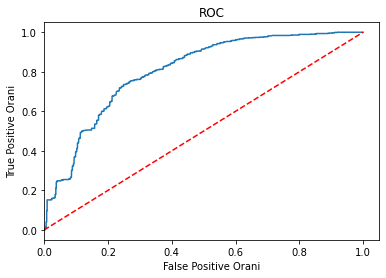

In [57]:
logit_roc_auc = roc_auc_score(y_test,log_model2.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, log_model2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label = "AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.05])
plt.xlabel("False Positive Orani")
plt.ylabel("True Positive Orani")
plt.title("ROC")
plt.show()

In [58]:
log_cv_score2 = np.mean(cross_val_predict(log_model2,X_train,y_train.values.ravel(),cv=10))
print("CV R2 Accuracy\t:",log_cv_score2) 

CV R2 Accuracy	: 0.11547693128278069


**Validasyon islemi gerceklestikten sonraki Test Hatasi;**

In [59]:
log_RMSE_score2 = np.sqrt(np.mean(-cross_val_score(log_model2,X_test,y_test.values.ravel(),cv=10,scoring="neg_mean_squared_error")))
log_RMSE_score2

0.4907137658554119

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [60]:
log_R2_score2 = accuracy_score(y_test,log_model2.predict(X_test))
log_R2_score2

0.76

### **2. Support Vector Classifier**

Amac, iki sinif arasindaki ayrimin optimum olmasini saglayacak hiper-duzlemi bulmaktir.
* Asagidaki gorselde iki boyutlu bir veride ayristirma islemi goruldugu sekilde gerceklestirilebilir.
    * <div> 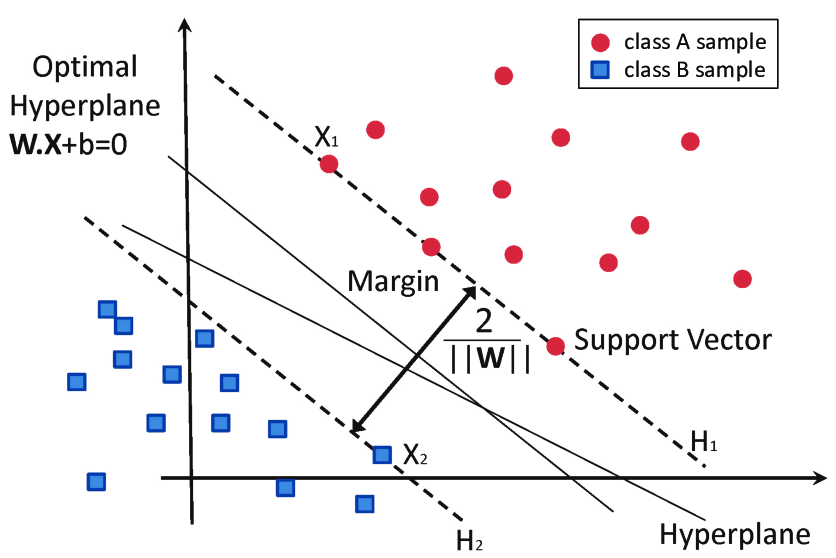</div>
* Gercek hayatta karsimiza cikan verisetlerinde birden fazla boyut soz konusu olabiliyor. Bu sebeple yukaridaki gibi dogrusal bir ayrim her zaman gerceklestirilememektedir. Bu durumda **non-linear svm** dedigimiz durum ortaya cikmaktadir. Bu durumda **Kernel Trick** adi verilen yontem ile ayristirmalar saglanabilmektedir. Solda gorulen sekilde dogrusal bir sekilde ayristirilamadigindan bu durumda *boyut arttirma* islemi yapilarak, 2 boyuttan 3 boyuta gecerek, sagdaki grafigi elde ediyoruz. Boylece siniflari birbirinden ayirt edebiliyoruz.
    * <div> 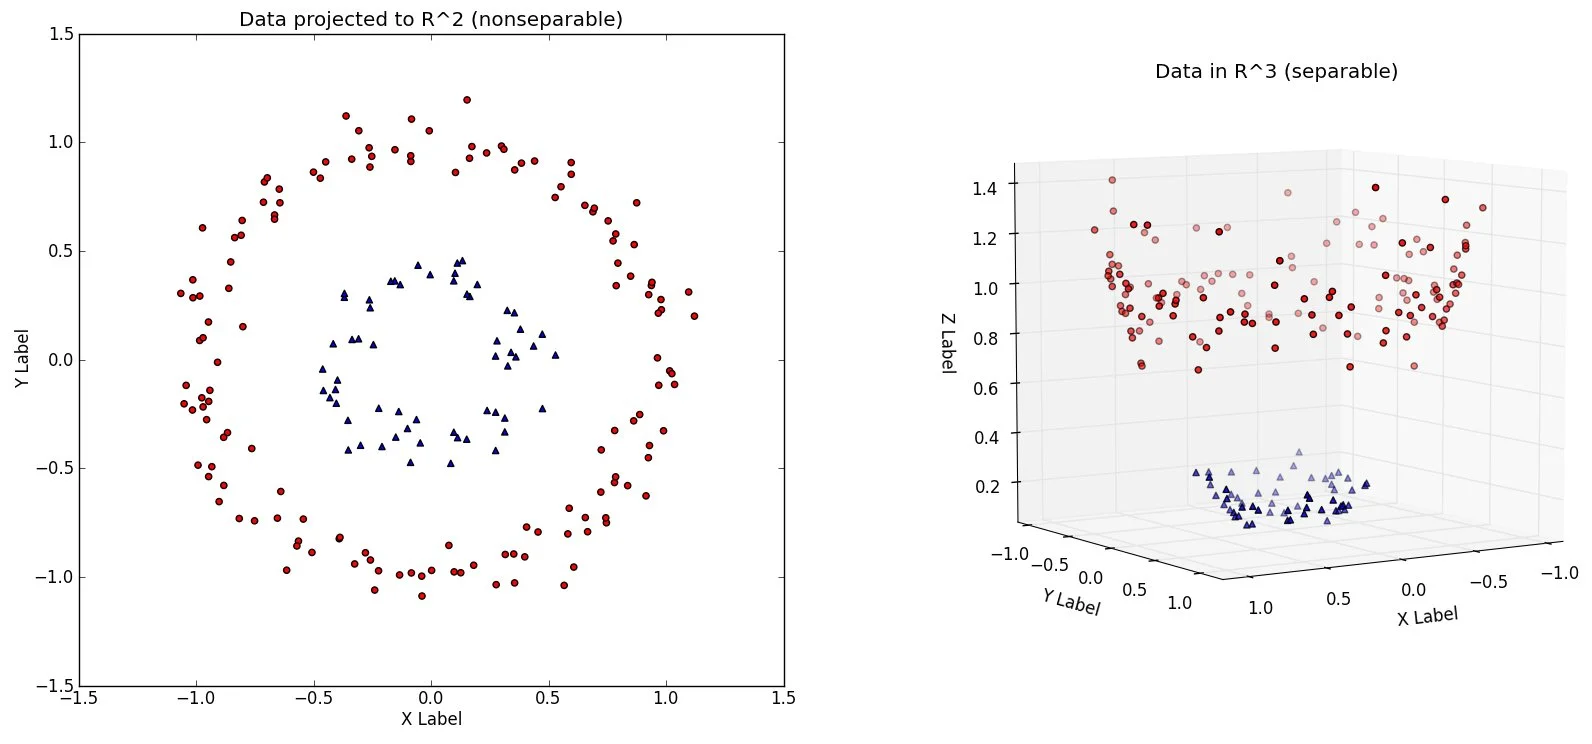</div>

In [61]:
y = copied_df["sirketten_ayrildi"]
X = copied_df.drop(["sirketten_ayrildi"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

### i. Linear SVC - Model Oluşturma

Fonksiyonu kullanmak icin **sklearn.svm** altindan **SVC** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [62]:
svc_model = SVC(kernel="linear").fit(X_train,y_train)

In [63]:
svc_model.score(X_test,y_test)

0.7816161616161617

#### Linear SVC - Model Oluşturma Tuning

Burada *linear* olan SVC modelinin hiperparametresi olan **C** degerini tune edecegiz. C degeri, aykiri gozlemlerin goreceli olarak etkilerini kontrol altinda tutup olusacak olan duzlemin kontrol etme imkanini saglar.

In [64]:
svc_model = SVC(kernel="linear",C=5).fit(X_train,y_train)
svc_cv_score = np.mean(cross_val_predict(svc_model,X_train,y_train.values.ravel(),cv=2))
print("CV R2 Accuracy\t:",svc_cv_score) 

CV R2 Accuracy	: 0.16588715295054235


In [65]:
svc_RMSE_score = np.sqrt(np.mean(-cross_val_score(svc_model,X_test,y_test.values.ravel(),cv=2,scoring="neg_mean_squared_error")))
svc_RMSE_score

0.4647145316854165

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [66]:
svc_R2_score = accuracy_score(y_test,svc_model.predict(X_test))
svc_R2_score

0.8131313131313131

### ii. (RBF) Radial Basis Function SVC - Model Oluşturma

Burada dogrusal olmayan SVC modelini kullanacagiz. SVC modelinin default kernel degeri *rbf*'tir.

In [67]:
svc_model = SVC().fit(X_train,y_train)
svc_model.score(X_test,y_test)

0.7915151515151515

#### RBF SVC - Model Tuning

* C degeri, aykiri gozlemlerin goreceli olarak etkilerini kontrol altinda tutup olusacak olan duzlemin kontrol etme imkanini saglar.
* Ayrica kernela verilmesi gereken bir parametre olan **gamma** parametresinin de optimize edilmesi gerekir. Optimize edilmeden de model kurulabilir fakat yeni modelde test hatasi hicbir islem yapmamiscasina ayni cikacaktir.

In [68]:
svc_params = {"C": [5, 10, 50],
             "gamma" : [0.0001, 0.001, 0.1, 1]}

svc_cv_model = GridSearchCV(svc_model,svc_params,cv=2,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


In [70]:
svc_cv_model.best_params_

{'C': 10, 'gamma': 0.1}

In [74]:
svc_rbf = SVC(C=10,gamma=0.01).fit(X_train,y_train)
svcrbf_cv_score = np.mean(cross_val_score(svc_rbf,X_train,y_train.values.ravel(),cv=10,scoring="r2"))
print("CV R2 Accuracy\t:",svcrbf_cv_score) 

CV R2 Accuracy	: 0.7558272858450701


In [75]:
svcrbf_RMSE_score = np.sqrt(np.mean(-cross_val_score(svc_rbf,X_test,y_test.values.ravel(),cv=10,scoring="neg_mean_squared_error")))
svcrbf_RMSE_score

0.22830070547681652

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [76]:
svcrbf_R2_score = accuracy_score(y_test,svc_rbf.predict(X_test))
svcrbf_R2_score

0.9537373737373738

### **3. Gradient Boosting Machines (GBM)**

AdaBoost'un siniflandirma ve regresyon problemlerine kolayca uyarlanabilen genellestirilmis versiyonudur. Artiklar uzerine tek bir tahminsel model formunda olan modeller serisi kurulur. Bundan sonra ele alacak oldugumuz butun agaca dayali algoritmalarin teorik frameworkudur. Uygun bir cost fonksiyonu uzerine calisan bir optimizasyon algoritmasidir.
* Boosting Yontemlerine Giris:
    * Zayif ogrenicileri bir araya getirip guclu bir ogrenici ortaya cikarmak fikrine dayanir.
    * Adaptive Boosting (AdaBoost)
        * Zayif siniflandiricilarin bir araya gelerek guclu bir siniflandirici olusturmasi fikrini hayata geciren algoritmadir.
        * Zayif ogrenicilerin uygulamasi asagida gorselde siniflandirma problemiyle betimlenmistir.
            * Box 1'de siniflar ikiye ayrilmis. Fakat kirmizi sinif olan nitelendirilen sag tarafta yanlis siniflandirilan bazi degerler bulunmaktadir.
            * Box 2'de yani ikinci iterasyonda yine bir siniflandirma islemi yapilmis. Bir onceki iterasyonda siniflandirmada hata yapilan mavilere agirlik verilmis. Fakat mavi siniflandirmasina koyulmus yine yanlis siniflandirmalar elde edilmis.
            * Box 3'te ise ikinci iterasyonda yanlis siniflandirilan kirmizilara agirlik verilmis. Dogru siniflandirilan degerler ise yuvarlak icine alinarak belirlenen siniflari korunmus.
            * Son iterasyonda ise veri icerisindeki siniflar cok basarili bir sekilde siniflandirilmis.
         * AdaBoostun calisma prensibinde iteratif bir sekilde kumulatif olarak isleme soz konusudur. Yani agaclarin birbirlerine bagimliligi soz konusudur. Bagging isleminde agaclar birbirinden bagimsizdir.
        * <div> 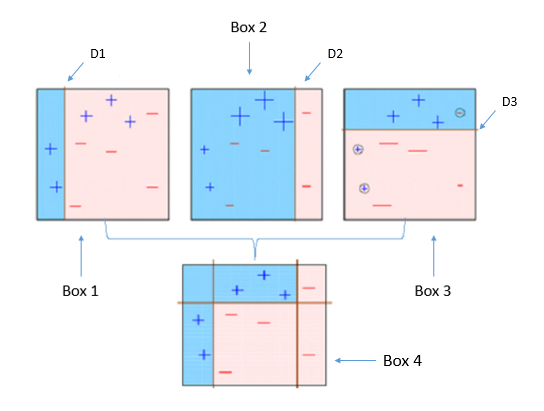</div>
* Gradient Boosting tek bir tahminsel model formunda olan modeller serisi olusturur.
* Seri icerisindeki bir model, serideki bir onceki modelin tahmin artiklarinin/hatalarinin (residuals) uzerine kurularak (fit) olusturulur.
* GBM diferansiyellenebilen herhangi bir kayip fonksiyonunu optimize edebilen *Gradient Descent* algoritmasini kullanmaktadir.
* GB bircok temel ogrenici tipi(base learner type) kullanabilir. (Tree, linear terms, splines, ...)
* Cost fonksiyonlari ve link fonksiyonlari modifiye edilebilirdir.
* Boosting + Gradient Descent olarak da anilabilir.
* <div> 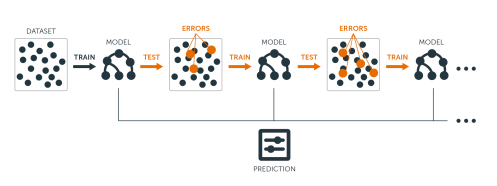</div>

In [78]:
y = copied_df["sirketten_ayrildi"]
X = copied_df.drop(["sirketten_ayrildi"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

### GBM - Model Oluşturma(C)

Fonksiyonu kullanmak icin **sklearn.ensemble** altindan **GradientBoostingClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [79]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)
gbm_model.score(X_test,y_test)

0.9767676767676767

#### GBM - Model Tuning(C)

In [80]:
gbm_params = {
    "max_depth" : [2,10],
    "min_samples_split" : [2,5],
    "n_estimators" : [100,1000]
}

gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=5, n_jobs=-1, verbose=5).fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [81]:
gbm_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 1000}

In [82]:
gbm_cv_model.best_score_

0.9877599558206974

In [84]:
gbm_model = GradientBoostingClassifier(max_depth=10,min_samples_split=2,n_estimators=1000).fit(X_train,y_train)
gbm_cv_score = np.mean(cross_val_score(gbm_model,X_train,y_train.values.ravel(),cv=5,scoring="r2"))
print("CV R2 Accuracy\t:",gbm_cv_score) 

CV R2 Accuracy	: 0.9339465821843801


In [85]:
gbm_RMSE_score = np.sqrt(np.mean(-cross_val_score(gbm_model,X_test,y_test.values.ravel(),cv=5,scoring="neg_mean_squared_error")))
gbm_RMSE_score

0.1340887690293187

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [86]:
gbm_R2_score = accuracy_score(y_test,gbm_model.predict(X_test))
gbm_R2_score

0.9905050505050506

* Toplamda 4 adet farkli model ile tahmin gerceklestirdik.
* Bu modellerin sonuclarini bir DataFrame olarak goz atacak olursak;

In [87]:
col = ["CV R2 Accuracy","RMSE","R2"]
row = [{"CV R2 Accuracy" : log_cv_score,"RMSE":log_RMSE_score,"R2":log_R2_score},
      {"CV R2 Accuracy" : log_cv_score2,"RMSE":log_RMSE_score2,"R2":log_R2_score2},
      {"CV R2 Accuracy" : svc_cv_score,"RMSE":svc_RMSE_score,"R2":svc_R2_score},
      {"CV R2 Accuracy" : gbm_cv_score,"RMSE":gbm_RMSE_score,"R2":gbm_R2_score}]

result = pd.DataFrame(row,columns=col,index=["Logistic Regression","LR with FS","SVC","GBM"])
result

,CV R2 Accuracy,RMSE,R2
Logistic Regression,0.142004,0.456601,0.792323
LR with FS,0.115477,0.490714,0.760000
SVC,0.165887,0.464715,0.813131
GBM,0.933947,0.134089,0.990505


## **Yeni Deger ile Tahmin**

* Yukarida 4 model ile tahminleme islemi gerceklestirildi.
* Bu modellerin dogrulugunu yukaridaki *result* degiskeni icerisindeki DataFrame de acikca gorebiliriz.
* En basarili modelin de **GBM** oldugunu gorebiliyoruz.

In [88]:
yeni_deger = pd.DataFrame([[  0.20,   0.67  , 3.  ,   205.  ,   2.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   1.  ,   0.  ]],columns=X_train.loc[0].index)
print("GBM modeliyle tahmin edilmis sirketten ayrilma durumu\t:\t",gbm_model.predict(yeni_deger)[0])

GBM modeliyle tahmin edilmis sirketten ayrilma durumu	:	 0


# **Soru 3: Bir çalışanın maaş derecesinin tahminlenmesi**

Bir calisanin maas derecesinin tahminlenmesi siniflandirmaya girmektedir.

In [225]:
y = copied_df.iloc[:,-3:]
X = copied_df.drop(df.columns[-3:],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

## **K-En Yakın Komşu (KNN)**

Tahminler gözlem benzerliğine göre yapılır.

Grafiksel bir örnek üzerinden bu durumu açıklamak gerekirse aşağıdaki grafikte;
* Gözlem birimlerinin dağılımı verilmiştir.
* Sağ taraftaki tabloda ise gözlem birimlerinin bağımlı ve bağımsız değişkenleri verilmiştir.
    * <div> 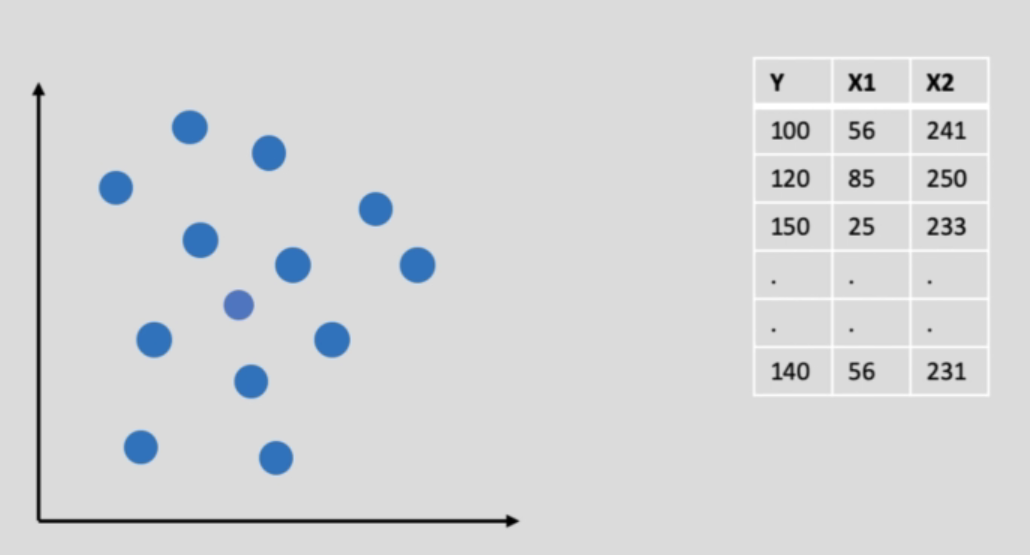</div>
* Yeni bir gözlem birimi geldiğinde y değerini tahmin etmeye çalışırız.
    * <div> 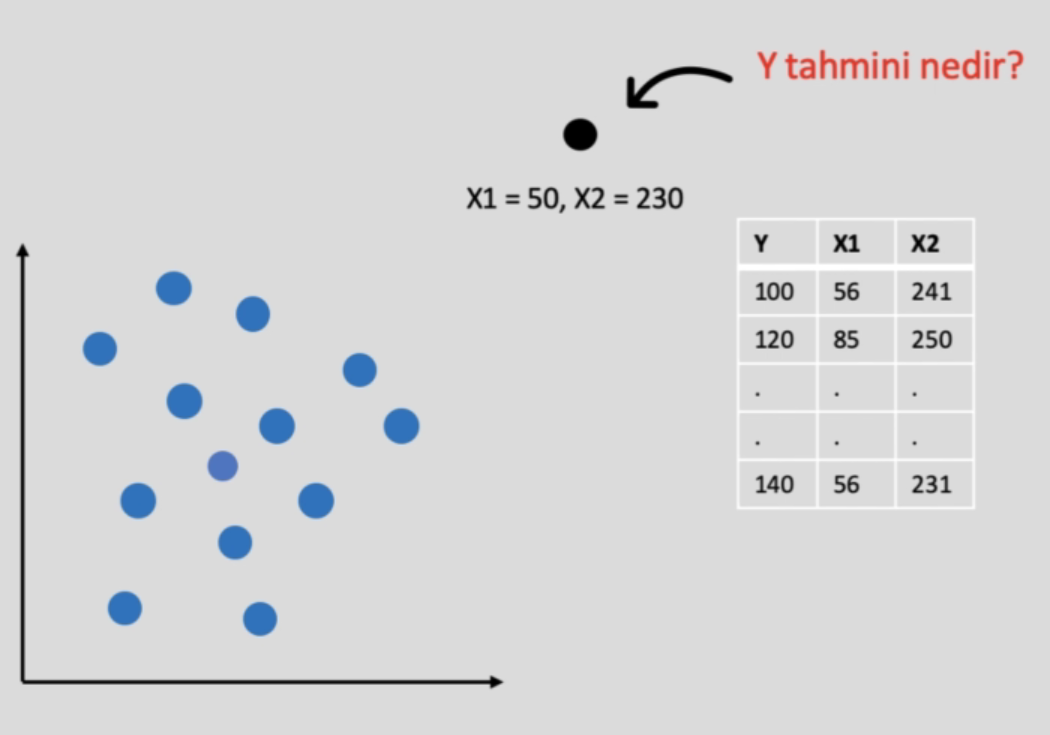</div>
* KNN algoritmasının burada gerçekleştirdiği işlem;
    * Öklid ya da benzeri bir uzaklık hesabı ile yen igelen gözlemin, verisetindeki her bir gözleme olan uzaklığı hesaplanır.
    * Daha sonra kendisine en yakın *k* adet gözlemin bağımlı değişken değerlerinin ortalaması alındığında yeni gelen gözlem biriminin bağımlı değişkenini bulmuş oluyoruz.
    * <div> 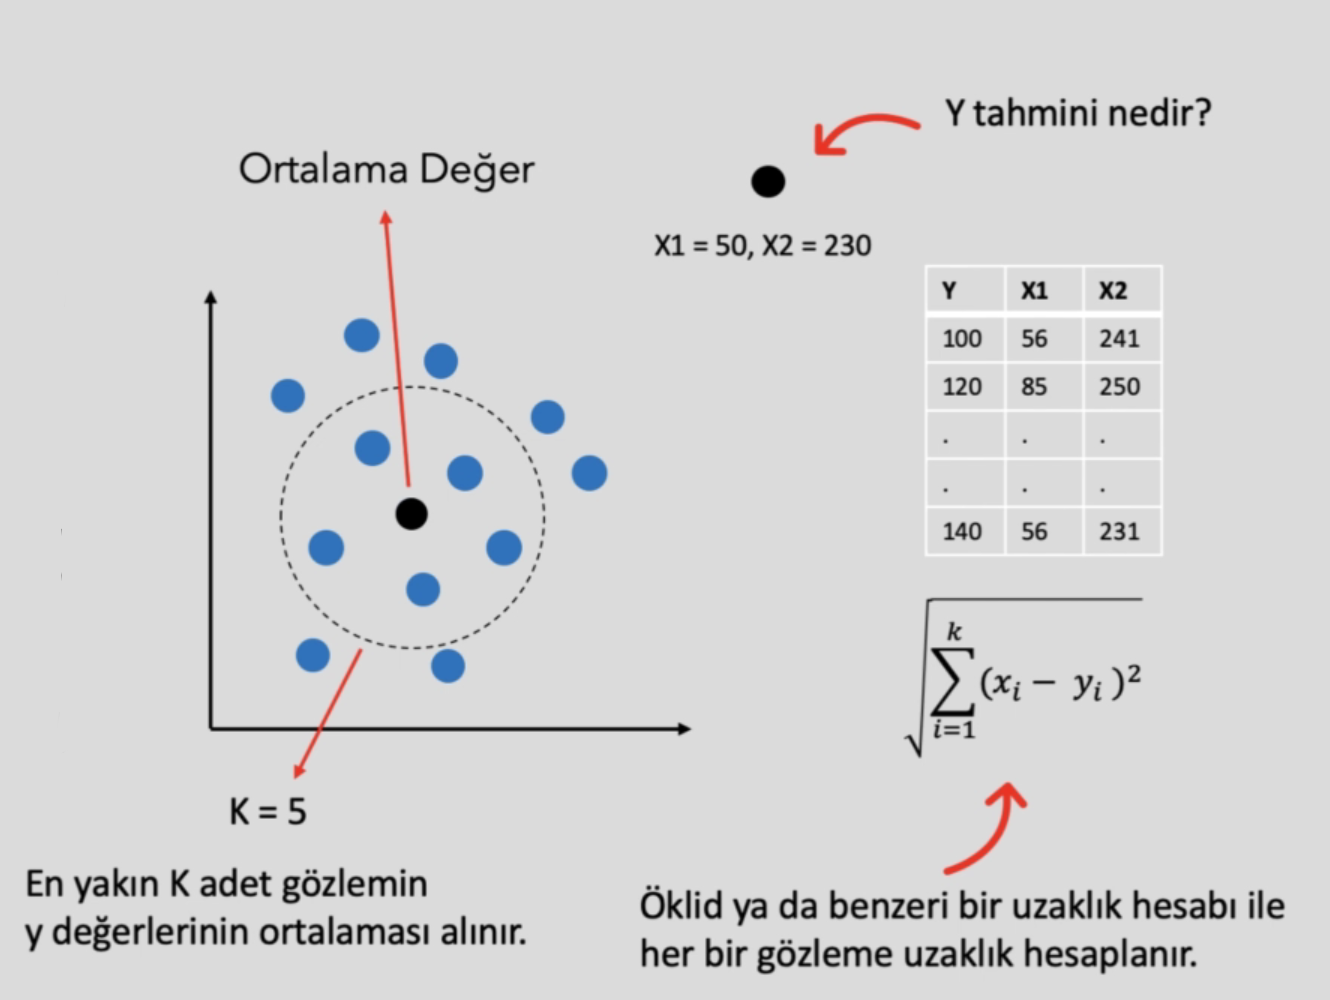</div>

**KNN Basamakları**
* Komşu sayısını belirle(K)
* Bilinmeyen nokta ile diğer tüm noktalar ile arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemi seç
* Sınıflandırma ise en sık sınıf değerini, regresyon ıse ortalama değeri tahmin değeri olarak ver.

### KNN - Model Oluşturma(C)

Fonksiyonu kullanmak icin **sklearn.neighbors** altindan **KNeighborsClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [226]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [227]:
print("Ilkel Test Hatasi (Accuracy Score):\t", accuracy_score(y_test,knn_model.predict(X_test)))

Ilkel Test Hatasi (Accuracy Score):	 0.4571717171717172


#### KNN - Model Tuning(C)

KNN modelinde optimize edilmesi gereken dissal hiperparametremiz *k* komsu sayimizdi. Bunun optimal degerini GridSearchCV yardimiyla bulacagiz.

In [228]:
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors" : np.arange(1,100)}

knn_cv = GridSearchCV(knn_model,knn_params,cv=10,n_jobs=-1,verbose=5).fit(X_train,y_train)
knn_cv.best_params_

Fitting 10 folds for each of 99 candidates, totalling 990 fits


{'n_neighbors': 1}

In [229]:
knn_model = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
knn_cv_score = np.mean(cross_val_predict(knn_model,X_train,y_train,cv=10))
print("CV R2 Accuracy\t:",knn_cv_score) 

CV R2 Accuracy	: 0.3333333333333333


In [230]:
knn_RMSE_score = np.sqrt(np.mean(-cross_val_score(knn_model,X_test,y_test,cv=10,scoring="neg_mean_squared_error")))
knn_RMSE_score

0.5700729470718331

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [231]:
knn_R2_score = accuracy_score(y_test,knn_model.predict(X_test))
knn_R2_score

0.5802020202020202

## **Farkli Modeller ile Calisma**

### **1. Feature Selection sonrasi KNN**

In [117]:
korelasyon_degerleri = abs(copied_df.corr()["maas_derecesi_high"])
korelasyon_degerleri[korelasyon_degerleri > 0.1]

sirketten_ayrildi             0.120929
calistigi_bolum_management    0.209077
maas_derecesi_high            1.000000
maas_derecesi_low             0.292560
maas_derecesi_medium          0.260274
Name: maas_derecesi_high, dtype: float64

In [118]:
korelasyon_degerleri = abs(copied_df.corr()["maas_derecesi_low"])
korelasyon_degerleri[korelasyon_degerleri > 0.1]

sirketten_ayrildi       0.134722
maas_derecesi_high      0.292560
maas_derecesi_low       1.000000
maas_derecesi_medium    0.847144
Name: maas_derecesi_low, dtype: float64

In [119]:
korelasyon_degerleri = abs(copied_df.corr()["maas_derecesi_medium"])
korelasyon_degerleri[korelasyon_degerleri > 0.1]

maas_derecesi_high      0.260274
maas_derecesi_low       0.847144
maas_derecesi_medium    1.000000
Name: maas_derecesi_medium, dtype: float64

Korelasyon tablosundan yazdirdigim degerler goz onune alindiginda *maas_derecesi* ozniteligi ile en fazla iliskili olan oznitelikler yukarda bulunmaktadir.
* **Burada maas_derecesi'ne en fazla etki edecek olan oznitelik 'sirketten_ayrildi'dir.**

In [120]:
y = copied_df.iloc[:,-3:]
X = copied_df.drop(df.columns[-3:],axis=1).loc[:,["sirketten_ayrildi","calistigi_bolum_management"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

### KNN - Model Oluşturma(C)

Fonksiyonu kullanmak icin **sklearn.neighbors** altindan **KNeighborsClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [121]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [122]:
print("Ilkel Test Hatasi (Accuracy Score):\t", accuracy_score(y_test,knn_model.predict(X_test)))

Ilkel Test Hatasi (Accuracy Score):	 0.49474747474747477


#### KNN - Model Tuning(C)

KNN modelinde optimize edilmesi gereken dissal hiperparametremiz *k* komsu sayimizdi. Bunun optimal degerini GridSearchCV yardimiyla bulacagiz.

In [123]:
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors" : np.arange(1,100)}

knn_cv = GridSearchCV(knn_model,knn_params,cv=10,n_jobs=-1,verbose=5).fit(X_train,y_train)
knn_cv.best_params_

Fitting 10 folds for each of 99 candidates, totalling 990 fits


{'n_neighbors': 13}

In [124]:
knn_model = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
knn_cv_score2 = np.mean(cross_val_predict(knn_model,X_train,y_train,cv=10))
print("CV R2 Accuracy\t:",knn_cv_score) 

CV R2 Accuracy	: 0.3333333333333333


In [125]:
knn_RMSE_score2 = np.sqrt(np.mean(-cross_val_score(knn_model,X_test,y_test,cv=10,scoring="neg_mean_squared_error")))
knn_RMSE_score2

0.6173692421434527

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [126]:
knn_R2_score2 = accuracy_score(y_test,knn_model.predict(X_test))
knn_R2_score2

0.21636363636363637

### **2. Yapay Sinir Ağları (ANN)**

In [144]:
y = copied_df.iloc[:,-3:]
X = copied_df.drop(df.columns[-3:],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

### ANN - Model Oluşturma(C)

Fonksiyonu kullanmak icin **sklearn.neural_network** altindan **MLPClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [145]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [151]:
mlpc = MLPClassifier(max_iter=10000).fit(X_train_scaled,y_train)

In [152]:
mlpc.score(X_test_scaled,y_test)

0.40585858585858586

#### ANN - Model Tuning(C)

Algoritmalar karmasiklastikca onlarin karakteristigi ile alakali bilgi sahibi olmamiz zorunlu hale gelir. Mesela biraz once herhangi bir parametre atamasi yapmadan modelimizi olusturduk. Mesela fonksiyonumuzun solver parametresine tanmis on tanimli degeri *adam* degeri fakat bu yontem buyuk verisetleri uzerinde calisirken verimli olmaktadir. Bunun gibi durumlar ile karsilasmamak icin algoritmalarin topolojisini bilmek gerekir.

* **hidden_layer_sizes :** tuple seklinde verilir. verilirken hem gizli katman sayisi hem de katman icerisindeki noron sayisi da belirtilmis olur.
* **activation :** aktivasyon fonksiyonu da optimize edilmesi gereken bir parametredir. classification icin relu ontanimli degeri uygundur.
* **solver :** w agirliklarinin bulunma yontemini belirleyen parametredir. 
* **learning_rate :** bazi agaca dayali yontemlerde numerik degerler verilse de burada ise yontem olarak verilmektedir. agirlik guncellemesi icin verilen yontem parametresidir. 
* **alpha :** L2 penalty parameter. Duzenlilestirme terimidir. Ridge ve Lassodaki cezalandirma terimi ile ayni islevdedir.

In [159]:
mlpc_params = {
    "alpha": [0.0001, 0.1, 0.01],
    "hidden_layer_sizes" : [
                 (10,10,10),
                 (50,100,25),
                (25,50)
             ]
              }

mlpc_cv_model = GridSearchCV(mlpc,mlpc_params,cv=5,n_jobs=-1,verbose=5).fit(X_train_scaled,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [160]:
mlpc_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 25)}

In [162]:
mlpc_model = MLPClassifier(alpha=0.01,hidden_layer_sizes=(50, 100, 25)).fit(X_train,y_train)
mlpc_cv_score = np.mean(cross_val_predict(mlpc_model,X_train,y_train,cv=5))
print("CV R2 Accuracy\t:",mlpc_cv_score) 

CV R2 Accuracy	: 0.21959067237204366


In [163]:
mlpc_RMSE_score = np.sqrt(np.mean(-cross_val_score(mlpc_model,X_test,y_test,cv=5,scoring="neg_mean_squared_error")))
mlpc_RMSE_score

0.5888412406871709

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [164]:
mlpc_R2_score = accuracy_score(y_test,mlpc_model.predict(X_test))
mlpc_R2_score

0.2113131313131313

### **3. Random Forest**

In [169]:
y = copied_df.iloc[:,-3:]
X = copied_df.drop(df.columns[-3:],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

### RF - Model Oluşturma(C)

Fonksiyonu kullanmak icin **sklearn.ensemble** altindan **RandomForestClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [170]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [171]:
rf_model.score(X_test,y_test)

0.516969696969697

#### RF - Model Tuning(C)

Random Forestin optimize edilecek en onemli 2 degeri bulunmakta, bunlar;
* *n_estimators* : Kullanilacak olan agac sayisi 
* *max_features* : Bolunmelerde goz onunde bulundurulacak olan degisken sayidir.

In [172]:
rf_params = {
    "max_depth" : [2,5,8,10],
    "max_features" : [2,5,8],
    "n_estimators" : [10,500,1000],
    "min_samples_split" : [2,5,10]
}

rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [173]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 10}

In [175]:
rfc_model = RandomForestClassifier(max_depth=10,max_features=5,min_samples_split=2,n_estimators=10).fit(X_train,y_train)
rfc_cv_score = np.mean(cross_val_predict(rfc_model,X_train,y_train,cv=5))
print("CV R2 Accuracy\t:",rfc_cv_score) 

CV R2 Accuracy	: 0.16923740339005539


In [176]:
rfc_RMSE_score = np.sqrt(np.mean(-cross_val_score(rfc_model,X_test,y_test,cv=5,scoring="neg_mean_squared_error")))
rfc_RMSE_score

0.5596415399151972

Modelimizin $R^2$ skoru da asagida gorulmektedir.

In [207]:
rfc_R2_score = accuracy_score(y_test,rfc_model.predict(X_test))
rfc_R2_score

0.28525252525252526

* Toplamda 4 adet farkli model ile tahmin gerceklestirdik.
* Bu modellerin sonuclarini bir DataFrame olarak goz atacak olursak;

In [178]:
col = ["CV R2 Accuracy","RMSE","R2"]
row = [{"CV R2 Accuracy" : knn_cv_score,"RMSE":knn_RMSE_score,"R2":knn_R2_score},
      {"CV R2 Accuracy" : knn_cv_score2,"RMSE":knn_RMSE_score2,"R2":knn_R2_score2},
      {"CV R2 Accuracy" : mlpc_cv_score,"RMSE":mlpc_RMSE_score,"R2":mlpc_R2_score},
      {"CV R2 Accuracy" : rfc_cv_score,"RMSE":rfc_RMSE_score,"R2":rfc_R2_score}]

result = pd.DataFrame(row,columns=col,index=["KNN","KNN with FS","ANN","RF"])
result

,CV R2 Accuracy,RMSE,R2
KNN,0.333333,0.570073,0.580202
KNN with FS,0.333333,0.617369,0.216364
ANN,0.219591,0.588841,0.211313
RF,0.169237,0.559642,0.285253


## **Yeni Deger ile Tahmin**

* Yukarida 4 model ile tahminleme islemi gerceklestirildi.
* Bu modellerin dogrulugunu yukaridaki *result* degiskeni icerisindeki DataFrame de acikca gorebiliriz.
* En basarili modelin de **KNN** oldugunu gorebiliyoruz.

In [372]:
yeni_deger = pd.DataFrame([[  0.20,   0.67  , 3.  ,   205.  ,   2.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   1.  ]],columns=X_train.loc[0].index)
print("KNN modeliyle tahmin edilmis maas derecesi\t:\t",knn_model.predict(yeni_deger)[0])

KNN modeliyle tahmin edilmis maas derecesi	:	 [0 0 1]


In [234]:
y_test.head(1)

,maas_derecesi_high,maas_derecesi_low,maas_derecesi_medium
1670,0,0,1


# **Soru 4: Çalışanların benzerliklerine göre gruplara ayrılması**

Calisanlarin benzerliklerine gore gruplara ayrilmasi islemi kumeleme islemine girmektedir.

In [350]:
df = pd.read_csv("insan_kaynaklari.csv")
df = df[["memnuniyet_duzeyi","aldigi_degerlendirme_puani","maas_derecesi"]]
df.head()
# 3 classes of 15k instance which are low,medium and high
# dataset has two features: memnuniyet_duzeyi and aldigi_degerlendirme_puani
# the third column is for maas_derecesi

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,maas_derecesi
0,0.38,0.53,low
1,0.80,0.86,medium
2,0.11,0.88,medium
3,0.72,0.87,low
4,0.37,0.52,low


## **K-Means**

Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır. Bu aslında clustering yöntemlerinin bir amacıdır. Clustering yöntemlerinde benzerlik matrixleri veya çeşitli uzaklık metrikleri kullanılarak gözlemler veya değişkenler kümelendirilmeye çalışılmaktadır. **Oluşturulmaya çalışan kümelerin kendi içinde homojen, birbirlerine göre ise heterojen olması amaçlanır.** Clustering yöntemleri *hiyerarşik ve hiyerarşik olmayan* yöntemler olarak ikiye ayrılmaktadır. K-Means yöntemi de hiyerarşik olmayan bir clustering yöntemidir.
* **K-Means Adımları:**
    1. Küme sayısı belirlenir.
    2. Rastgele k merkez seçilir.
    3. Her gözlem için k merkezlere uzaklıklar hesaplanır ve gözlemler kendisine en yakın k merkezine atanır.
    4. Her gözlem en yakın olduğu merkeze yani kümeye atanır.
    5. Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.
    6. Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve kümeiçi hata kareler toplamlarının toplamının (*Total Within-Cluster Variation*) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.
* Burada gözlemler kümeleme işlemi bitinceye kadar farklı kümelere girip çıkabilmektedir.
![image.gif](https://miro.medium.com/max/480/1*4mMckJCPtQNUy7hm8gCLkg.gif)

### KMeans - Model Oluşturma

Fonksiyonu kullanmak icin **sklearn.cluster** altindan **KMeans** fonksiyonunu projemize dahil etmemiz gerekiyor.
* Burada odaklanacagimiz iki adet parametre bulunmaktadir.
    * **n_clusters** : kac adet kume olusturacagimizi belirtiriz
    * **n_init** : algoritmanin merkezlere gore kac defa olusturulacagini belirtir.

In [351]:
x = df.iloc[:,:-1].values

Elbow metodu uygulanacagi icin rastgele bir deger atandi.

In [352]:
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit_predict(x)

array([2, 0, 3, ..., 2, 3, 2], dtype=int32)

Eger her bir sinifin merkezine ulasmak istersek *cluster_centers_* ile ulasabiliriz. Burada her bir satir bir sinifi temsil etmektedir. 

In [353]:
kmeans5.cluster_centers_

array([[0.84693754, 0.88281955],
       [0.58900242, 0.82366586],
       [0.43548976, 0.52573113],
       [0.15355775, 0.83525247],
       [0.81614354, 0.59247767]])

Eger her bir gozlemin hangi sinifta oldugunu ogrenmek istersek *labels_* ile ulasabiliriz.

In [354]:
kmeans5.labels_

array([2, 0, 3, ..., 2, 3, 2], dtype=int32)

Kumelenmeyi gorsellestirme islemini gerceklestiriyoruz.

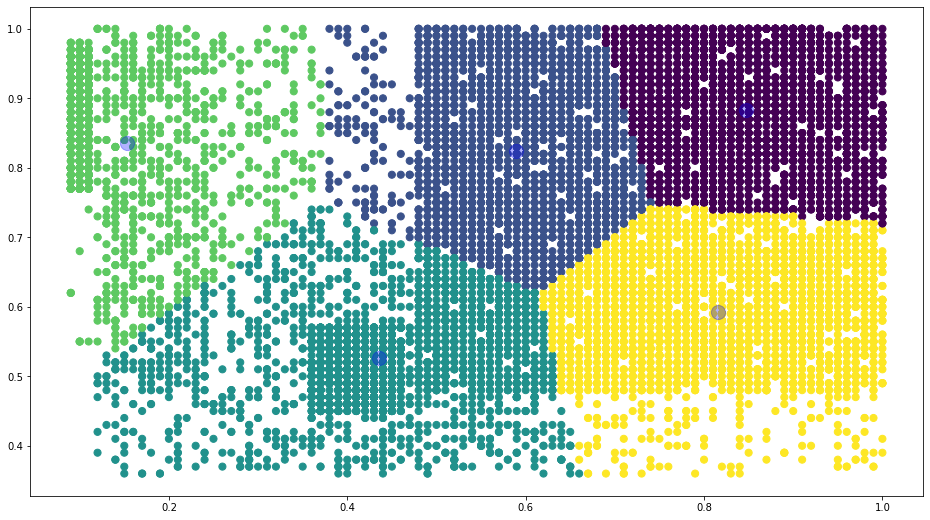

In [355]:
# Gozlemlerin siniflarina gore yerlestirilmesi
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kmeans5.labels_,s=50)

# Merkezlerin yerlestirilmesi
plt.scatter(kmeans5.cluster_centers_[:,0],kmeans5.cluster_centers_[:,1],c="blue",s=200,alpha=0.3);


#### KMeans - Model Tuning

K-Means modelinin optimize edilecek hiperparametresi ise kume sayisidir. Bizim icin onemli olan kumeler ici homojenligin maksimum, kumeler arasi heterojenligin de maksimum olmasidir. K-Means modelinin kume sayisini bulmak izlenen matematiksel yol ise;
* Her bir gozlem biriminin icinde bulundugu kumenin merkezine olan uzakliklarinin hesaplanmasi ve bunu her bir kume icin gerceklestirilmesi.
* Bu sonuclarin toplanmasiyla olusan degere ise SSE dedigimiz hata kareler toplami bulunur. Burada hatadan kastimiz uzaklik olacaktir. 
* Bu degerin degerlendirilmesine gore optimum kume sayisi bulunacaktir.
* Bunun icin cesitli yontemler bulunmaktadir;
    * Elbow Methow
        * Elbow metodu; noktaların her K değerine göre küme merkezine uzaklıklarının karesi toplamı hesaplanmaktadır. Bu değerlere göre her K değeri için grafik çizilmektedir. Grafik üzerinde toplamlar arasındaki farkın azalmaya başladığı dirsek noktası en uygun K değeri olarak belirlenmektedir.
        * 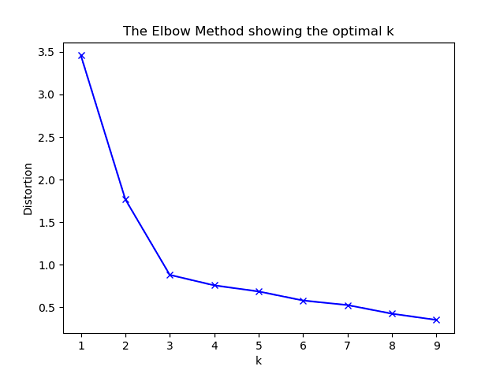
    * Average Silhouette Method
        * Silhoutte metodu; her K değeri için kümelerin farklılığına bakmaktadır. Oluşan kümeler için -1 ve 1 arasında değerler üretmektedir. 1'e en yakın K değeri en uygun olarak belirlenmektedir.
        * 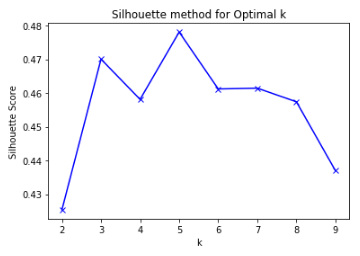
    * GAP Statistic Clustering

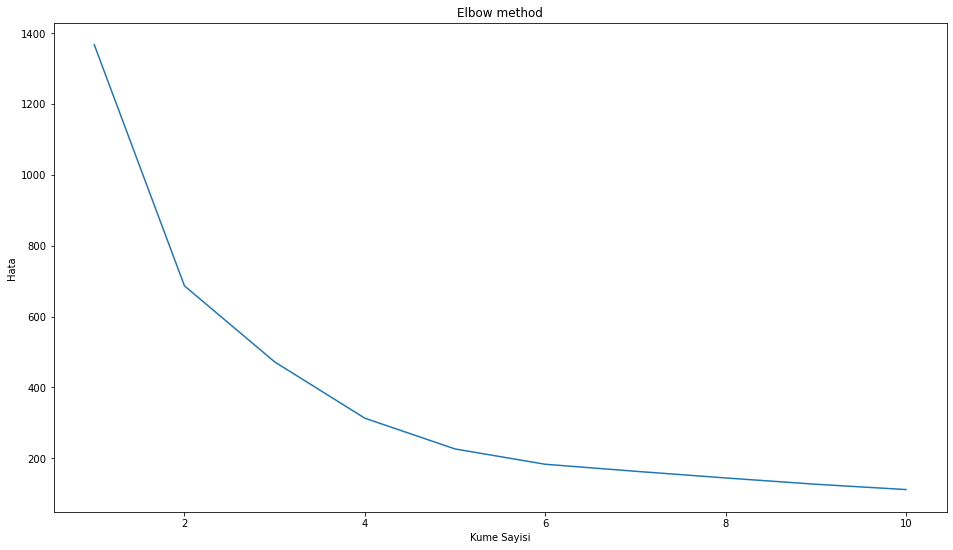

In [356]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('Kume Sayisi')
plt.ylabel('Hata')
plt.show()

Şimdi verimizi indirgenme yapılmadan üç boyutta görselleştirme işlemini gerçekleştireceğiz. Bunun için **mpl_toolkits.mplot3d** altından **Axes3D** fonksiyonunu dahil ediyoruz.

In [357]:
k_model = KMeans(n_clusters=5).fit(x)

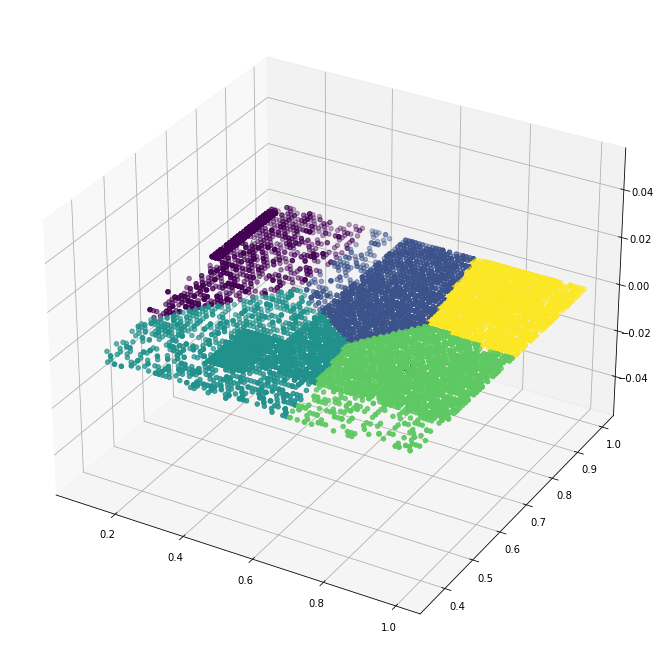

In [358]:
# Noktalarin gorsellestirilmesi
plt.rcParams["figure.figsize"] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1], c= k_model.labels_)


# Kumelerin ve merkezlerin gorsellestirilmesi
ax.scatter(k_model.cluster_centers_[:,0],
           k_model.cluster_centers_[:,1],
          marker="*",
          c="#050505",
          s=250);

KMeans algoritmasini calisanin *memnuniyet_duzeyi* ve *aldigi_degerlendirme_puani*na gore *maas_derecesi* etiketine gore gruplandirmasini planlamistim.
Fakat Elbow metodunda goruldugu uzere calisan grubunu 5 gruba ayirmak ve maas derecesini de bu 5 gruba gore tekrardan duzenlemek sirket acisindan daha rasyonel bir degisim olacaktir.

In [359]:
df["KMeans Kumeler"] = k_model.labels_
cluster_results = df.copy()
cluster_results

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,maas_derecesi,KMeans Kumeler
0,0.38,0.53,low,2
1,0.80,0.86,medium,4
2,0.11,0.88,medium,0
3,0.72,0.87,low,4
4,0.37,0.52,low,2
...,...,...,...,...
14994,0.40,0.57,low,2
14995,0.37,0.48,low,2
14996,0.37,0.53,low,2
14997,0.11,0.96,low,0


## **Farkli Modeller ile Calisma**

### **1. Hierarchical Clustering**

Gozlemler daha fazla alt sayida kumelere ayrilmak istendiginde kullanilabilir. Temelde veri setini 2ye 3 ve olusan her veri etini tekrardan bolumlenerek bircok segmentasyon olusturulmus olur.
* Asagida gorunen grafik klasik hiyerarsik kumeleme sonucunda olusan yapidir. Buna Cluster Dendrogram denir.
* Burada y ekseninde veri setindeki gozlemler yer almaktadir.
* Burada 4 temel kumeye bolummus fakat her kume kendi icerisinde de bolunmeler gerceklestirmis.
* Hiyerarsik kumeleme yontemleri **Agglomerative (Birlestirici)** ve **Divisive (Bolumleyici)** sekleinte temel olarak ikiye ayrilmaktadir.
    * Divisive
        * Baslangicta sadece bir tane kume vardir, o da tum verisetidir.
        1. Tum gozlemlerin bir arada oldugu kume iki alt kumeye ayrilir.
        2. Olusan yeni kumeler birbirlerine benzemeyen alt kumelere bolunur.
        3. Ayni islem gozlem sayisi kadar kume elde edilinceye kadar tekrar edilir.
    * Agglomerative
        * Baslangicta gozlem sayisi kadar kume vardir.
        1. Verisetinde birbirine en yakin olan iki gozlem bulunur.
        2. Bu iki nokta bir araya getirilerek yeni bir gozlem olusturulur. Yani artik veriseti ilk birlesimdeki gozlemlerden olusmaktadir.
        3. Ayni islem tekrarlanarak yukari dogru cikilir. Yani iki kum,enin birlesiminden olusan bu yeni kumeler ayni sekilde birbirlerine benzerliklerine gore tekrar birlestirilir. Bu islem tum gozlemler tek bir kumede toplanana kadar bu islemler tekrar edilir.
        * Birbirine yakin noktalar uzaklik olculeri kullanarak belirlenir. Bu olculere ornekler verirsek; Eucledian Distance, Manhattan Distance, Correlation etc.
* Hiyerarsik kumelemele yontemlerinde *kume sayisina dendrograma bakarak karar verilir.* Hiyerarsik olmayan kumeleme yontemlerinde ise *kume sayisi uygulama yapilmadan once belirlenir.*
* Hiyerarsik kumeleme yonteminde veriseti gozlemler veya degiskenler bazinda kumeleme islemlerine sokulabilirken, hiyerarsik olmayan yontemlerde ise sadece gozlemlerin kumelenmesi mumkundur.
* Karar agaclarindan farki; karar agaclarinda ayirma islemi hedef degiskene gore yapilirken burada bagimli degisken olmadigi icin gozlemler bagimsiz degiskenler uzerinden yapilan uzaklik hesaplarina gore kumelere ayrilir.
* 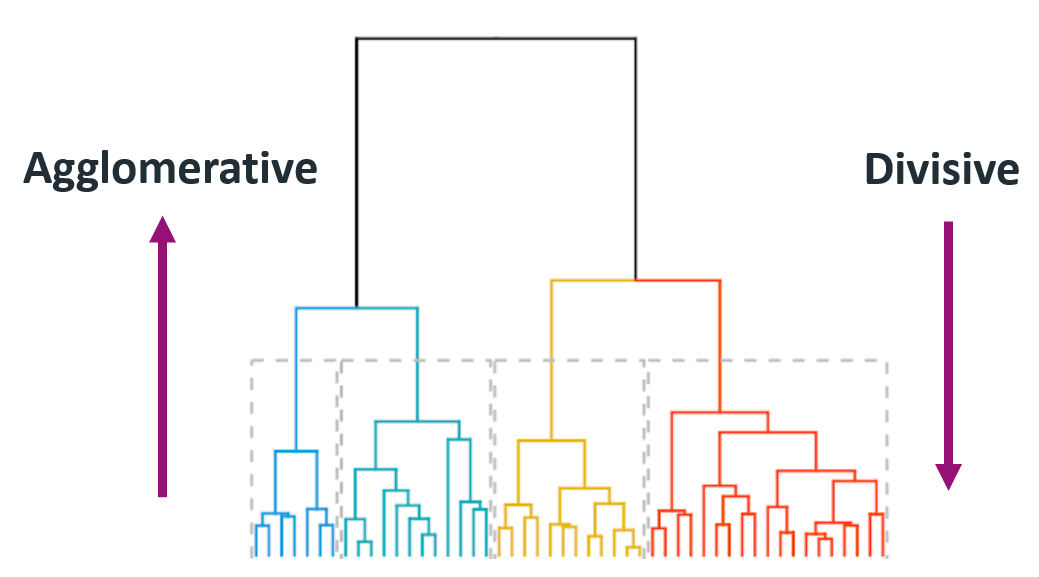

### HC - Model Oluşturma

Fonksiyonu kullanmak icin **scipy.cluster.hierarachy** altindan **linkage** fonksiyonunu projemize dahil etmemiz gerekiyor.
* Burada ilk parametremize DataFrame nesnemizi veriyoruz.
* Ikinci parametre olarak hesaplama metotlarindan hangisini kullanmak istedigimizi belirtiyoruz.
    * Dokumantasyon icerisindeki metotlar:
      * **method='single'**   : This is also known as the Nearest Point Algorithm.

      * **method='complete'** : This is also known by the Farthest Point Algorithm or Voor Hees Algorithm.

      * **method='average'**  : This is also called the UPGMA algorithm.

      * **method='weighted'** : This is also called WPGMA.

      * **method='centroid'** : This is also known as the UPGMC algorithm.

      * **method='median'**   :  This is also known as the WPGMC algorithm.

      * **method='ward'** uses the Ward variance minimization algorithm.

In [364]:
df = pd.read_csv("insan_kaynaklari.csv")
df = df[["memnuniyet_duzeyi","aldigi_degerlendirme_puani"]]
df.head()

,memnuniyet_duzeyi,aldigi_degerlendirme_puani
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


In [365]:
hc_ward   = linkage(df,"ward")

Burada gorsellestirme islemini gerceklestirmek icin yine **scipy.cluster.hierarachy** altindan **dendrogram** fonksiyonunu projemize dahil etmemiz gerekiyor. Burada parametre olarak *linkage* fonksiyonu ile olusturdugumuz instancei vermemiz yeterli oluyor.

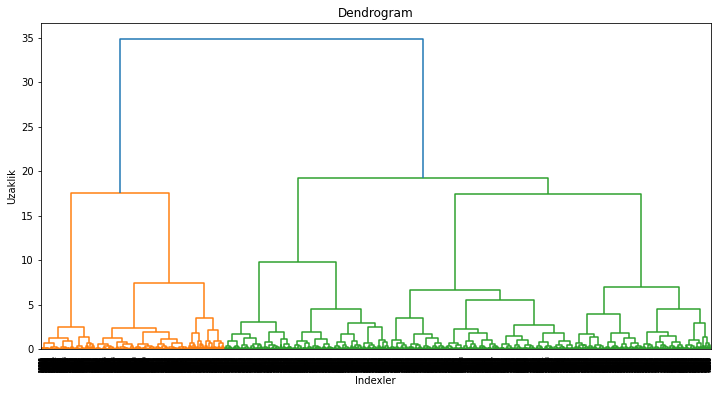

In [366]:
plt.figure(figsize=(12,6))
plt.title("Dendrogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")

dendrogram(hc_ward);

Goruldugu uzere cok fazla elemanimiz oldugu icin indexlerdeki numaralarin bize bir yardimi dokunmuyor. Bu sebeple yorumlarimizi dendrogram uzerinden yapabilmemiz icin genelleme yapabilmek adina dendrogrami budamak(truncate) etmemiz gerekiyor. Bu islem verecegimiz n sayisi kadar olusmus kumeyi ve icindeki elemanlarini dendrogram uzerinde bize gosterecektir. Bu islemi yapabilmek icin
* dendrogram fonksiyonu icerisine
    * truncate_mode = "lastp"
    * p = kac kume gostermek istiyorsak
    * show_contracted = True parametrelerini vererek islemimizi gerceklestirebiliyoruz.

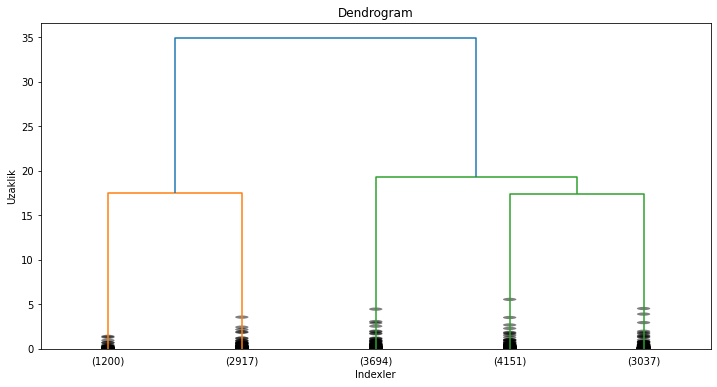

In [367]:
plt.figure(figsize=(12,6))
plt.title("Dendrogram")
plt.xlabel("Indexler")
plt.ylabel("Uzaklik")

dendrogram(hc_ward,
           leaf_font_size=10,
          truncate_mode="lastp",
          p=5,
          show_contracted=True);

#### HC - Model Tuning

Burada optimum kume sayisini dendrogram uzerinden *is bilgimize dayanarak* kendimiz ifade edecegiz. Bu islemi yukaridaki grafikten yorumlarsak, y ekseninde 20 uzakligindan bolumleme gerceklestirdigimizde 5 adet kume sayisi bu  veriseti icin uygun gorunuyor.
* Bu islemi **sklearn.cluster** altindan **AgglomerativeClustering** fonksiyonunu projemize dahil ederek gerceklestiriyoruz.

In [337]:
cluster = AgglomerativeClustering(n_clusters=5,
                                 affinity="euclidean",
                                 linkage="ward").fit_predict(df)
cluster

array([1, 4, 3, ..., 1, 3, 1])

In [368]:
cluster_results["Hierarchical Clustering"] = cluster
cluster_results

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,maas_derecesi,KMeans Kumeler,Hierarchical Clustering
0,0.38,0.53,low,2,1
1,0.80,0.86,medium,4,4
2,0.11,0.88,medium,0,3
3,0.72,0.87,low,4,4
4,0.37,0.52,low,2,1
...,...,...,...,...,...
14994,0.40,0.57,low,2,1
14995,0.37,0.48,low,2,1
14996,0.37,0.53,low,2,1
14997,0.11,0.96,low,0,3


# **Enes Alper Balta - 05170000021**